# Исследование продаж видеоигр и определение закономерностей, которые определяют их успешность

**Описание проекта:**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».



**Цели исследования**

- Выявить определяющие успешность игры закономерности
- Отработать принцип работы с данными для прогноза продаж

 **Ход исследования**
 
 Данные для проведения анализа получим из файла `***`. При этом о данных ничего не известно, за исключением того что они представлены до 2016 года. Поэтому, перед тем как приступить к целям исследования, потребуется обзор и описание полученных данных. 
 
 Проверим данные на наличие ошибок: оценим как представлены данные, проверим типы данных, проверим наличие пропусков и дубликатов. После этого постараемся избавиться от ошибок там где это возможно и если они будут обнаружены. После чего перейдем к самому исследованию.
 
 **Для достижения поставленных целей сделаем следующее:**
 
 
 - Загрузим и опишем данные
 
 
 - Проведем предобработку данных, если это необходимо:
   - Приведем данные к общему виду
   - Проверим данные на наличие пропусков и дубликатов и очистим от них данные
   - При необходимости изменим типы данных и проведем их оптимизацию


 - Проведем исследовательский анализ данных:
   - Проверим данные на предмет наличия аномальных значений
   - Если это необходимо, добавим новые параметры в данные
   - Опишем и визуализируем общую информацию о играх и их продажах. Исследуем следующие вопросы:
     - Сколько игр выпускалось в разные годы?
     - Как менялись продажи по платформам?
     - Какой период для анализа можно считать актаульным?
     - Какие платформы лидируют по продажам, растут или падают?
     - Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?
     - Что можно сказать про общее распределение игр по жанрам?
    
    
 - Составим портрет пользователя каждого региона
 
 
 - Проверим несколько гипотез, которые могут помочь сделать ставку на потенциально популярный продукт:
   - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?
   - Средние пользовательские рейтинги жанров Action и Sports разные?
 
 
 - Сформируем выводы

In [1]:
# импортируем библиотеки, которые понадобятся нам для решения поставленных задач
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

## Первый взгляд на данные

Прочитаем файл `***` и ознакомимся с общей информацией о датасете методом `info()` и просмотрим первые несколько строк датасета методом `head()`:

In [2]:
# сохраним данные в переменную 'games'
games = pd.read_csv('***')

In [3]:
# ознакомимся с общей информацией
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В датасете представлены 16 715 строк и 11 колонок. При этом сразу заметны пропуски в колонках: `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` и `Rating`. Общий размер датасета: 1.4+ MB.

In [4]:
# посмотри на первые строки датасета
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Опишем данные представленные в датасете:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB

In [5]:
# проверим за какой период времени у нас представленны данные
print(f"Данные в датасете 'games' охватывают период с {int(games['Year_of_Release'].min())}"
      f" по {int(games['Year_of_Release'].max())} года.")

Данные в датасете 'games' охватывают период с 1980 по 2016 года.


### Результаты обзора данных

- В датасете представлены исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation)
- Данные в датасете охватывают период с 1980 по 2016 года
- В датасете представлены 16 715 строк и 11 колонок. При этом обнаружены пропуски в колонках: `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` и `Rating`
- Приведено описание всех данных представленных в датасете
- Общий размер датасета: 1.4+ MB
- Необходима предобработка данных.

## Предобработка данных

По итогам обзора данных в датасете были обнаружены факторы которые "загрязняют" данные. Необходимо проверсти предобработку данных:
- Приведем данные к общему виду
- Проверим наличие дубликатов и пропусков в данных и очистим от пропусков и дубликатов датасет там где это возможно
- При необходимости изменим типы данных и проведем их оптимизацию

In [6]:
# приведем наименование колонок в датасете к нижнему регистру
games.columns = map(str.lower, games.columns)

# посмотрим на результат
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Наименование колонок в датасете привели к общему виду.

### Работа с пропусками

Детальнее проверим пропуски в данных:

In [7]:
# посчитаем пропуски в каждом столбце
total_pass_before = games.isna().sum().sum()
print(f'Общее количество пропусков до обработки: {total_pass_before}')
games.isna().sum()

Общее количество пропусков до обработки: 22318


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
# изучим данные с пропусками в 'name' подробнее
games.loc[(games['name'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Данных с пропусками в `name` - 2 строки, при этом в этих строках пропущены и другие данные, в том числе и в `genre`. Данные с пропусками удалим. 

In [9]:
# удалим строки с пропущенными значениями в 'name' из датасета
games = games.dropna(subset=['name'])

# проверим пропуски в 'name':
print(f"Количество пропусков в 'name': {games['name'].isna().sum()}")

Количество пропусков в 'name': 0


In [10]:
# изучим данные с пропусками в 'year_of_release' подробнее
games.loc[(games['year_of_release'].isna())].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Заполнить пропуски в `year_of_release` можно несколькими способами. 

Для начала можно попробовать заполнить пропуски в `year_of_release` за счет наличия в датасете информации об одних и тех же играх, только выпущенных для разных платформ в надежде, что у какой-то из версий игры будет информация о годе выпуска.


Оставшиеся пропуски заполним так: 

В части данных с пропущенными значениями в `year_of_release` - год игры указан в ее наименовании. Это поможет восстановить если не все оставшиеся пропуски в `year_of_release`, то хотя бы их часть. 
- Найдем в значениях столбца `name` 4 последовательные цифры (год выпуска игры)
- Выведем их в отдельный столбец `year`
- Заменим пропуски в столбце `year_of_release` соответствующим значением из `year`
- Удалим столбец `year`

Оставшиеся пропуски оставим.

In [11]:
# преобразуем весь столбец в 'string'
games['year'] = games['name'].astype(str)

# проверим данные на наличие года в названии и оставим либо число, либо пропуск:
games['year'] = games['year'].str.findall('\d{4}').apply(lambda x: x[0] if len(x) > 0 else np.NaN)

# заполним пропуски в 'year_of_release' значением из 'year', если в 'year_of_release' - пропуск, а в 'year' - есть значение
games.loc[(games['year_of_release'].isna()) & (games['year'].notna()), 'year_of_release'] = games['year']

# удалим 'year'
games = games.drop(['year'], axis=1)

# проверим пропуски в 'year_of_release'
print(f"Количество пропусков в 'year_of_release' после изменений: {games['year_of_release'].isna().sum()}")

Количество пропусков в 'year_of_release' после изменений: 252


Заполнить все пропуски в `year_of_release`, к сожалению, не удалось.

Игры могут выходить на разных платформах и их оценки на разных платформах могут значительно отличаться, поэтому пропуски в `critic_score` и `user_score` оставим без изменений. Но на рейтинг игры тип платформы не влияет, поэтому мы можем частично заполнить пропуски в `rating`. Сделаем это так:
- Cгруппируем данные по `name` со значением `rating`
- C помощью `transorm` применим пользовательскую функцию для заполнения пропусков в `rating`
  - Если есть несколько пар значений `name` - `rating` и в одном из значений `rating` нет пропуска - этим значением (модой, на случай если в нескольких из значений `rating` нет пропуска) будут заполнены остальные значения `rating` в данной паре, где пропуски есть.
  
На случай если пропуски в `rating` останутся заполним их значением — 'unknown'

In [12]:
# заполним пропуски в 'rating' описанным выше методом
games['rating'] = (
    games.groupby('name')['rating']
    .transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.NaN))
)

# оставшиеся пропуски заполним значением 'unknown'
games['rating'] = games['rating'].fillna('unknown')

# проверим пропуски в 'rating':
print(f"Количество пропусков в 'rating' после изменений: {games['rating'].isna().sum()}")

Количество пропусков в 'rating' после изменений: 0


Все пропуски в `rating`, устранены.

In [13]:
# изучим количество игр с каждым рейтингом
games['rating'].value_counts()

unknown    6327
E          4153
T          3090
M          1654
E10+       1471
EC           10
K-A           4
RP            3
AO            1
Name: rating, dtype: int64

In [14]:
# проверим пропуски в каждом столбце после изменений
total_pass_after = games.isna().sum().sum()
print(f'Общее количество пропусков после обработки: {total_pass_after}')
print('Данные очищены от {:.1f}% пропусков.'.format(100 * (total_pass_before - total_pass_after) / total_pass_before))
games.isna().sum()

Общее количество пропусков после обработки: 15527
Данные очищены от 30.4% пропусков.


name                  0
platform              0
year_of_release     252
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating                0
dtype: int64

### Оптимизация типов данных в датасете

Изменим типы данных в следующих параметрах:

- `year_of_release`
  - Изменим тип данных на `int`
- `user_score`
  - Изменим тип данных на `float`

In [15]:
# для изменения типа данных в 'year_of_release' с 'object' на 'int' используем следующую кострукцию
games['year_of_release'] = np.floor(pd.to_numeric(games['year_of_release'], errors='coerce')).astype('Int64')

При попытке изменить тип данных `user_score` на `float` было найдено значение `'tbd'`. Это аббревиатура, которая обозначает «To Be Determined» (англ. «будет определено») и используется в различных областях и означает, что некоторые детали еще не известны или не определены. Изменим `'tbd'` на `'NaN'`.

In [16]:
# изменим 'tbd' на 'NaN' в `user_score`
games['user_score'] = games['user_score'].replace('tbd', np.NaN, regex=True)

# изменим тип данных на `float`
games['user_score'] = games['user_score'].astype(float)

Одна из целей исследования - отработать принцип работы с данными для прогноза продаж. Возможно в будущем процесс будет автоматизированным, поэтому важным моментом будет являтся оптимизация числовых типов данных, которая позволит сократить используемую память. 

In [17]:
# функция оптимизации типов данных в датасете
def optimize_memory_usage(df, print_size=True):
    
    # типы данных, которые будем проверять на оптимизацию
    row = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
    # размер занимаемой памяти до оптимизации (в Мб)
    before_size = df.memory_usage().sum() / 1024**2    
    for column in df.columns:
        column_type = df[column].dtypes
        if column_type in row:
            column_min = df[column].min()
            column_max = df[column].max()
            if str(column_type).startswith('int'):
                if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                    df[column] = df[column].astype(np.int8)
                elif column_min > np.iinfo(np.int16).min and column_max < np.iinfo(np.int16).max:
                    df[column] = df[column].astype(np.int16)
                elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                    df[column] = df[column].astype(np.int32)
                elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                    df[column] = df[column].astype(np.int64)  
            else:
                if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                    df[column] = df[column].astype(np.float32)                      
                else:
                    df[column] = df[column].astype(np.float64)
    
    # размер занимаемой памяти после оптимизации (в Мб)
    after_size = df.memory_usage().sum() / 1024**2
    if print_size:
        print('Размер занимаемой памяти: до {:5.4f} Mb - после {:5.4f} Mb. Размер занимаемой памяти сокращен на {:.1f}%.'
              .format(before_size, after_size, 100 * (before_size - after_size) / before_size))
    
# применим фнкуцию оптимизации к нашему датасету
optimize_memory_usage(games)

Размер занимаемой памяти: до 2.0500 Mb - после 1.6675 Mb. Размер занимаемой памяти сокращен на 18.7%.


Функция оптимизации позволила сократить размер занимаемой памяти на 18,7%. При больших объемах данных это существенный результат.

### Работа с дубликатами

Дубликаты в исследуемом датасете возможны в параметрах `name`, `genre` и `platform`. Для корректного поиска и удаления явных дубликатов приведем значения из этих параметров к нижнему регистру.

In [18]:
# приведем значения из 'name' к нижнему регистру
games['name'] = games['name'].str.lower()

# приведем значения из 'genre' к нижнему регистру
games['genre'] = games['genre'].str.lower()

# приведем значения из 'platform' к нижнему регистру
games['platform'] = games['platform'].str.lower()

In [19]:
# удалим явные дубликаты если они есть и обновим индексы
len_before = len(games)
games = games.drop_duplicates().reset_index(drop=True)
len_after = len(games)

# проверим сколько явных дубликатов было удалено
print(f"Количество удаленных явных дубликатов: {len_before - len_after}")

Количество удаленных явных дубликатов: 0


Явных дубликатов в датасете небыло. Перейдем к проверке неявных дубликатов. Они возможны в параметрах `genre` и `platform`

In [20]:
# изучим уникальные значения 'genre'
games['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

Неявные дубликаты в `genre` не обнаружены.

In [21]:
# изучим уникальные значения 'platform'
games['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

Неявные дубликаты в `platform` не обнаружены.

При этом мы должны учесть возможность наличия неявных дубликатов, которые могут возникнуть, если данные были собраны из разных источников или при возникновении технических ошибок. Учитывая, что мы уже привели названия столбцов и их значения к нижнему регистру, предлагаю провести проверку на дубликаты, основываясь на колонках `name`, `platform` и `year_of_release`. Суть проверки в следющем:
- Маловероятно что игру будут перевыпускать в течение одного года на той же самой платформе, скорее возможны патчи а не полноценный перевыпуск игры
- Если такие данные будут найдены, можно говорить о том что данные были собраны из разных источников или возникли технические ошибки при хранении, получении или загрузки данных.

In [22]:
# удалим явные дубликаты в колонках `name`, `platform` и `year_of_release` если они есть и обновим индексы
len_before = len(games)
dublicated_games = games[games[['name', 'platform', 'year_of_release']].duplicated(keep=False)]
games = games.drop_duplicates(subset=['name', 'platform', 'year_of_release']).reset_index(drop=True)
len_after = len(games)

# проверим сколько явных дубликатов было удалено
print(f"Количество удаленных явных дубликатов: {len_before - len_after}")
dublicated_games

Количество удаленных явных дубликатов: 1


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,ps3,2012,sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16228,madden nfl 13,ps3,2012,sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Действительно, в данных были дубликаты игр, которые выходили на одной платформе в один год. 

### Результаты предобработки данных

- Столбцы и значения в них приведены к общему виду
- Данные очищены от 30.4% пропусков 
- Изменены и оптимизированы типы данных в датасете, что позволило уменьшить объем занимаемой датасетом памяти на 18.7%
- Удалены дубликаты игр, которые выходили на одной платформе в один год

In [23]:
# check
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16712 entries, 0 to 16711
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16460 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float32
 5   eu_sales         16712 non-null  float32
 6   jp_sales         16712 non-null  float32
 7   other_sales      16712 non-null  float32
 8   critic_score     8136 non-null   float32
 9   user_score       7589 non-null   float32
 10  rating           16712 non-null  object 
dtypes: Int64(1), float32(6), object(4)
memory usage: 1.0+ MB


## Исследовательский анализ данных

В результате исследовательского анализа данных необходимо ответить на следующие вопросы:
     
- Сколько игр выпускалось в разные годы?
- Как менялись продажи по платформам?
- Какой период для анализа можно считать актаульным?
- Какие платформы лидируют по продажам, растут или падают?
- Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?
- Что можно сказать про общее распределение игр по жанрам? 


Для решения поставленных задач при проведении исследовательского анализа данных сделаем следующее:


- Если это необходимо, добавим новые параметры в данные
  - Посчитаем суммарные продажи во всех регионах
- Опишем и визуализируем общую информацию о играх и их продажах
- Определим актуальный период данных, который поможет сформировать прогноз на будущий период

### Работа с аномальными значениями и добавление новых параметров в датасет

Аномально высокие или аномально низкие значения возможны в следующих параметрах:

- `na_sales` — продажи в Северной Америке (миллионы проданных копий)
- `eu_sales` — продажи в Европе (миллионы проданных копий)
- `jp_sales` — продажи в Японии (миллионы проданных копий)
- `other_sales` — продажи в других странах (миллионы проданных копий)
- `critic_score` — оценка критиков (максимум 100)
- `user_score` — оценка пользователей (максимум 10)

При этом мы не можем удалить часть данных, поскольку это приведет к искажению результатов анализа. Да, возможно что, например, продажи могут быть аномально низкими в некоторых регионах или могут быть даже равны нулю, при этом это будет выглядеть правдоподобно (игра может не продаваться в конкретном регионе). Поэтому проведем проверку данных поверхностно:

- продажи не должны быть отрицательными
- оценки критиков находятся в диапазоне `0 - 100`
- оценки пользователей находятся в диапазоне `0 - 10`

Поскольку анализ нацелен на выявление определяющих успешность игры закономерностей, нам не нужны игры, у которых был релиз, но не было ни одной продажи ни в одном регионе. Такие игры удалим из данных.

In [24]:
# изучим статистику значений 'na_sales'
games['na_sales'].describe()

count    16712.000000
mean         0.263318
std          0.813587
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360001
Name: na_sales, dtype: float64

Медианное значение продаж в Северной Америке 80 тысяч копий игры, при этом очень много игр, которые не были реализованы на территории Северной Америки. При этом также встречаются и хиты. Максимальный объем проданных копий более 41 миллиона при минимальном значении 0.

In [25]:
# изучим статистику значений 'eu_sales'
games['eu_sales'].describe()

count    16712.000000
mean         0.145053
std          0.503373
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.959999
Name: eu_sales, dtype: float64

Медианное значение продаж в Европе 20 тысяч копий игры, при этом много игр, которые не были реализованы на территории Европы. Максимальный объем проданных копий почти 29 миллионов при минимальном значении 0.

In [26]:
# изучим статистику значений 'jp_sales'
games['jp_sales'].describe()

count    16712.000000
mean         0.077629
std          0.308880
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

Большая часть игр не была реализована на территории Японии. Максимальный объем проданных копий более 10 миллионов при минимальном значении 0.

In [27]:
# изучим статистику значений 'other_sales'
games['other_sales'].describe()

count    16712.000000
mean         0.047346
std          0.186747
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

Медианное значение продаж в других странах 10 тысяч копий игры, при этом много игр, которые не были реализованы на территории других стран. Максимальный объем проданных копий более 10 миллионов при минимальном значении 0.

In [28]:
# изучим статистику значений 'critic_score'
games['critic_score'].describe()

count    8136.000000
mean       68.965950
std        13.938153
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Средняя оценка критиков 69 баллов при медиане 71 балл. Оценки критиков находятся в диапазоне от 13 до 98 баллов. Данные выглядят правдоподобно

In [29]:
# изучим статистику значений 'user_score'
games['user_score'].describe()

count    7589.000000
mean        7.125260
std         1.499989
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

Средняя оценка пользователей 7.1 балл при медиане 7.5 баллов. Оценки пользователей находятся в диапазоне от 0 до 9.7 баллов. Данные выглядят правдоподобно

Удалим из данных игры, у которых был релиз, но не было ни одной продажи ни в одном регионе

In [30]:
# удаляем игры, у которых небыло продаж
games_before = len(games)
games = games.query('na_sales != 0 or eu_sales != 0 or jp_sales != 0 or other_sales != 0 ')
games_after = len(games)

# проверим сколько игр без одиной продажи было удалено
print(f"Количество удаленных игр без одиной продажи: {games_before - games_after}")

Количество удаленных игр без одиной продажи: 2


Добавим в датасет новый параметр — `total_sales` — суммарные продажи во всех регионах.

In [31]:
# посчитаем суммарные продажи во всех регионах для каждой игры
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

# посмотрим на результат
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.360001,28.959999,3.77,8.45,76.0,8.0,E,82.539993
1,super mario bros.,nes,1985,platform,29.080000,3.580000,6.81,0.77,NaN,NaN,unknown,40.240002
2,mario kart wii,wii,2008,racing,15.680000,12.760000,3.79,3.29,82.0,8.3,E,35.520000
3,wii sports resort,wii,2009,sports,15.610000,10.930000,3.28,2.95,80.0,8.0,E,32.770000
4,pokemon red/pokemon blue,gb,1996,role-playing,11.270000,8.890000,10.22,1.00,NaN,NaN,unknown,31.380001
5,tetris,gb,1989,puzzle,23.200001,2.260000,4.22,0.58,NaN,NaN,unknown,30.260000
6,new super mario bros.,ds,2006,platform,11.280000,9.140000,6.50,2.88,89.0,8.5,E,29.799999
7,wii play,wii,2006,misc,13.960000,9.180000,2.93,2.84,58.0,6.6,E,28.910000
8,new super mario bros. wii,wii,2009,platform,14.440000,6.940000,4.70,2.24,87.0,8.4,E,28.319998
9,duck hunt,nes,1984,shooter,26.930000,0.630000,0.28,0.47,NaN,NaN,unknown,28.309999


Данные готовы к анализу

### Сколько игр выпускалось в разные годы?

Изучим распределение количества игр в зависимости от года релиза. Для этого используем визуализацию данных, после чего сформируем выводы.

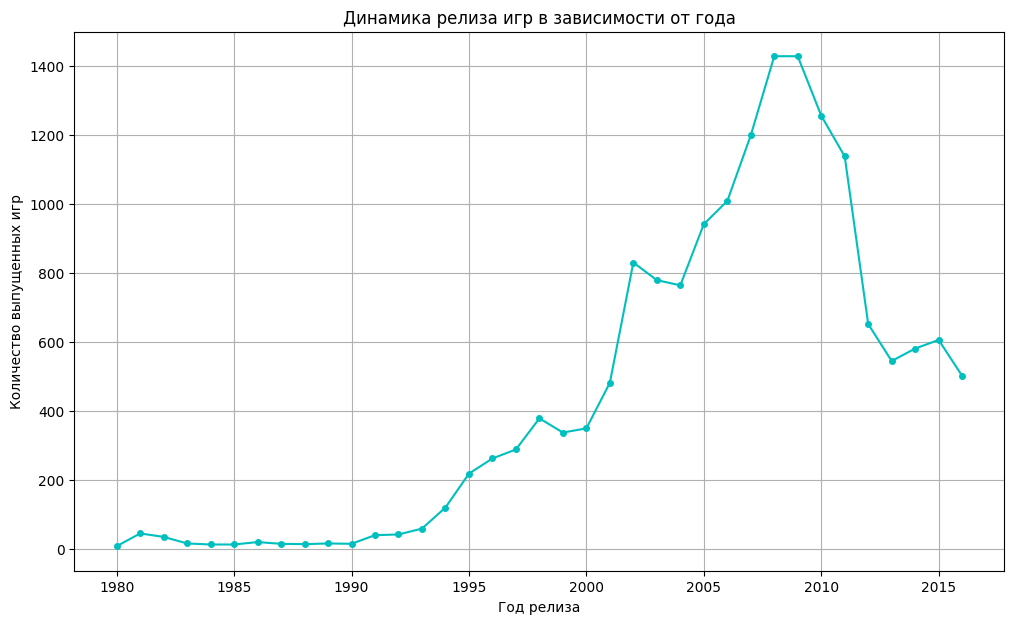

In [32]:
# сгруппируем данные по годам и изучим общее количество игр, релиз которых пришелся на конкретный год
games.groupby('year_of_release')['name'].count().plot(grid=True, style='o-', markersize=4, color='c', figsize=(12, 7))
plt.title('Динамика релиза игр в зависимости от года')
plt.xlabel('Год релиза')
plt.ylabel('Количество выпущенных игр');

Данные охватывают период с 1980 до 2016 года, при этом стабильный рост объема выпускаемых игр наблюдается с 1991 года. Стремительное увеличение выпускаемых игр приходится на 2001 - 2002 года, после следующих пары лет (2003-2004 года) объем выпускаемых игр ежегодно увеличивается вплоть до 2008 - 2009 годов. Пик популярности игр как раз приходится на 2008 - 2009 года после чего наблюдается резкое снижение объема выпускаемых ежегодно игр. 

Вожможно пользователи стали более выборочны и придирчивы к различным играм и разработчикам пришлось сосредоточиться на качестве выпускаемых игр а не на их количестве.

### Как менялись продажи по платформам?

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [33]:
# применим pivot_table() и найдем суммарные продажи для каждой платформы, за каждый год
platform_sales = (
    games.pivot_table(
    index=['platform', 'year_of_release'],
    values = ['total_sales'],
    aggfunc = {'total_sales': sum})
)

# Ознакомимкся с результатом
print(f"Количество пропущенных значений в сводной таблице 'platform_sales': {platform_sales.isna().sum().sum()}")
platform_sales.head(10)

Количество пропущенных значений в сводной таблице 'platform_sales': 0


total_sales
platform year_of_release             
2600     1980               11.380000
         1981               35.680000
         1982               28.879999
         1983                5.840000
         1984                0.270000
         1985                0.450000
         1986                0.670000
         1987                1.940000
         1988                0.740000
         1989                0.630000

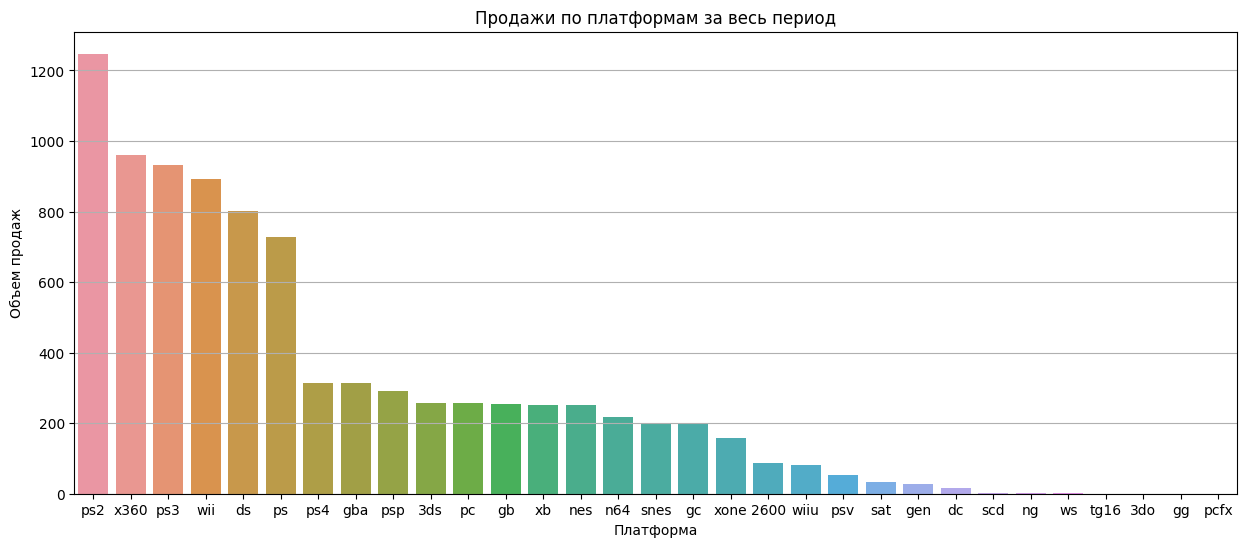

In [34]:
# визуализируем объем продаж по каждой из платформ
top_platform_sales = (
    platform_sales.reset_index()
    .groupby('platform')['total_sales'].sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(15, 6))
plt.grid(True)
sns.barplot(x=top_platform_sales.index, y=top_platform_sales)
plt.title('Продажи по платформам за весь период')
plt.xlabel('Платформа')
plt.ylabel('Объем продаж');

Самой популярной платформой для игр оказалась PS2 - объем проданных копий для нее более 1,2 млрд. В Топ 5 по популярности вошли:
- PS2
- X360
- PS3
- Wii
- DS

При этом шестая по популярности платфрома - PS - отстает от DS менее чем на 50 млн копий. Все остальные платформы показали результат значительно хуже чем первая шестерка.

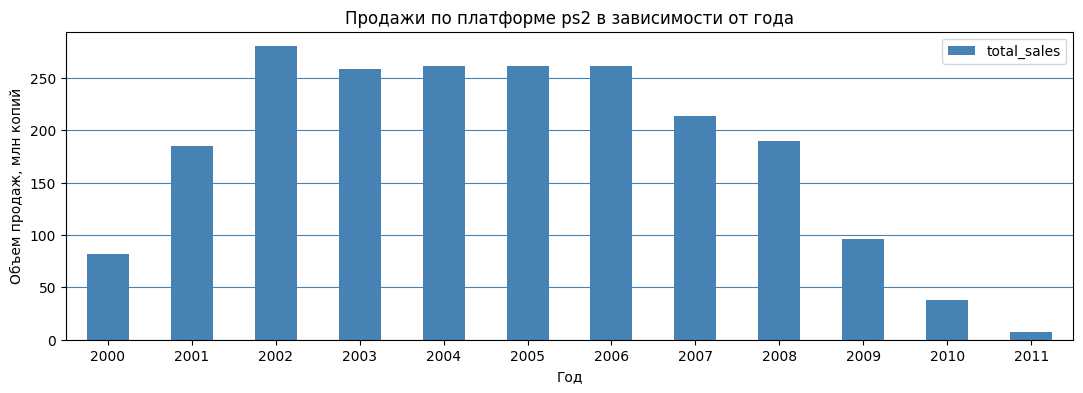

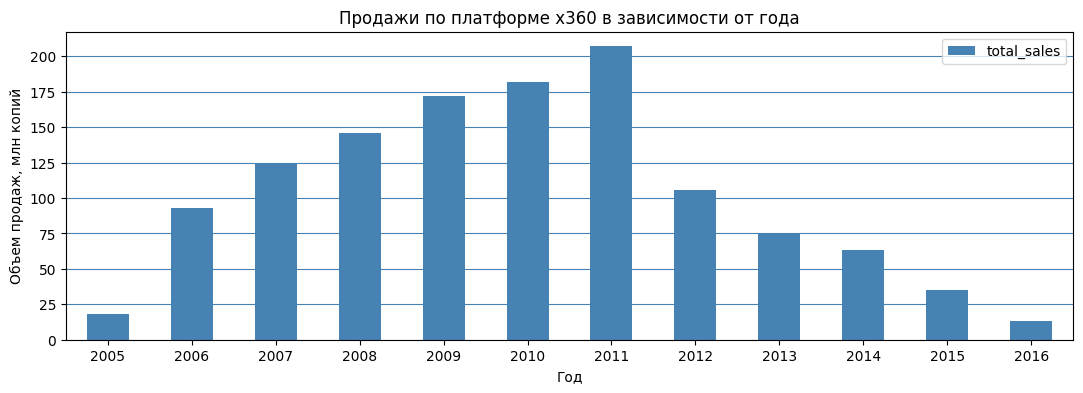

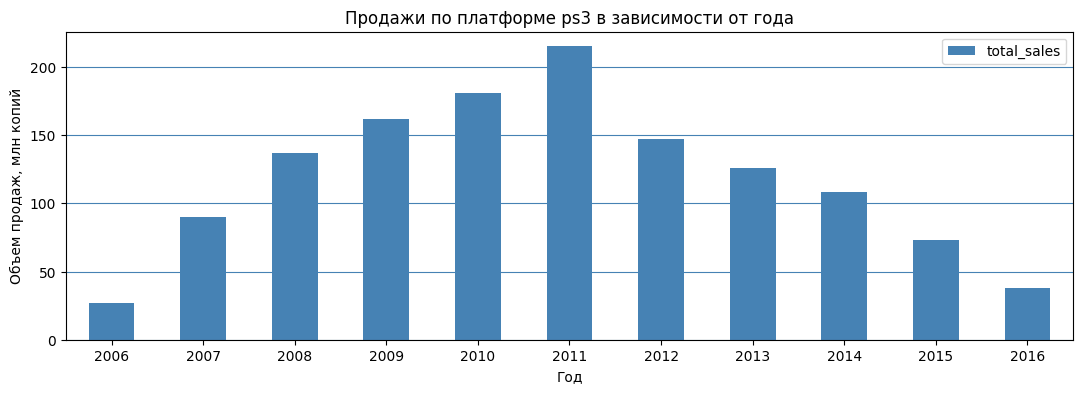

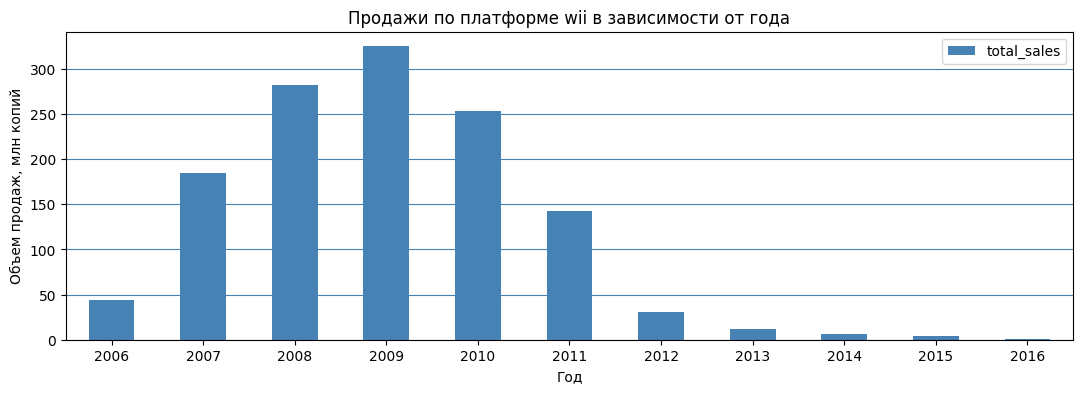

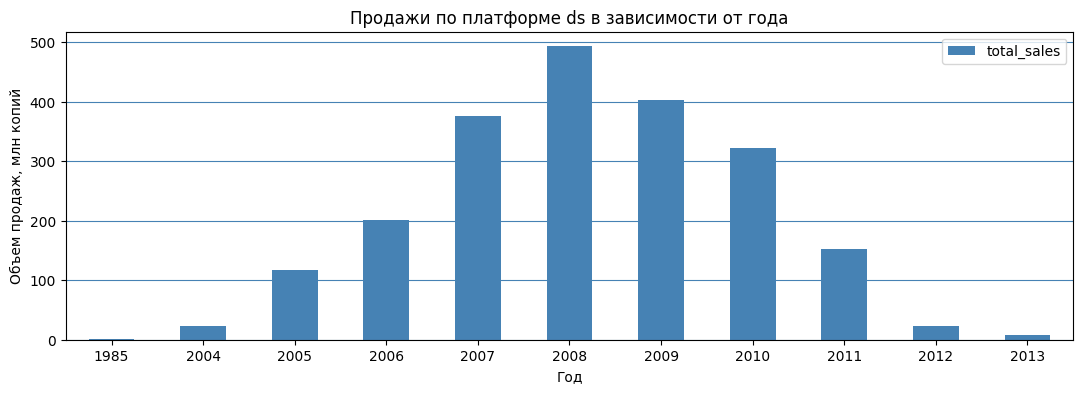

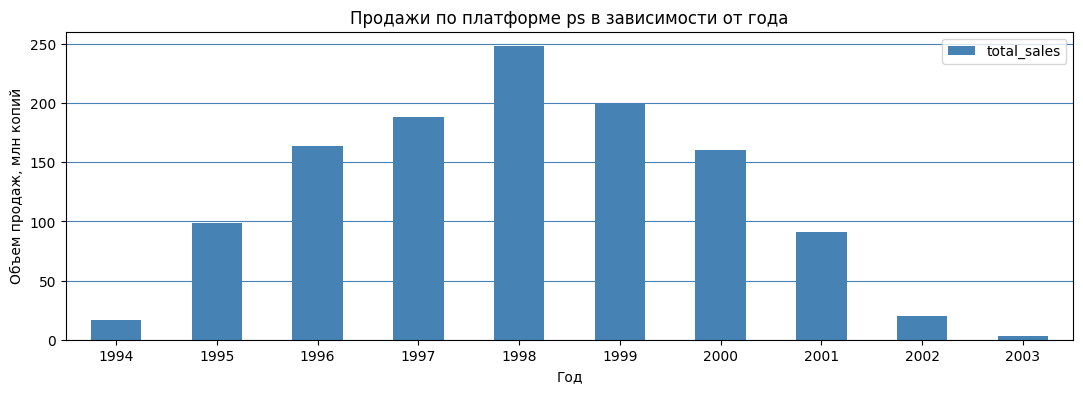

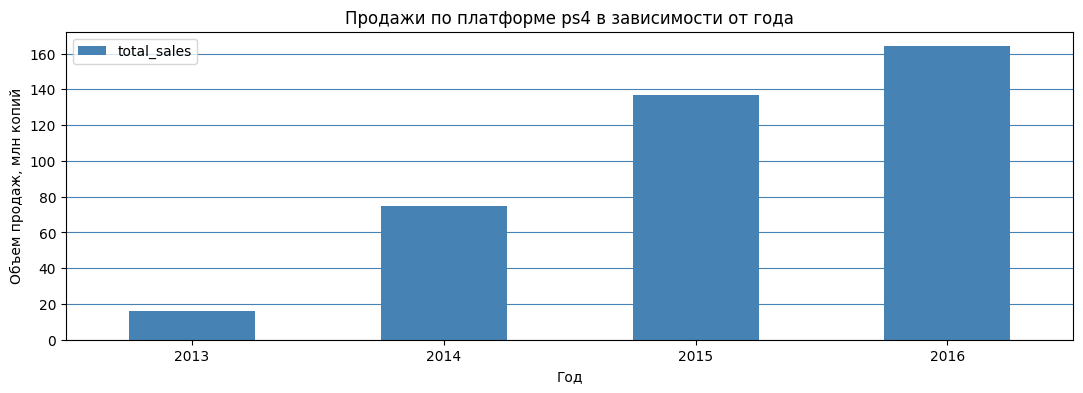

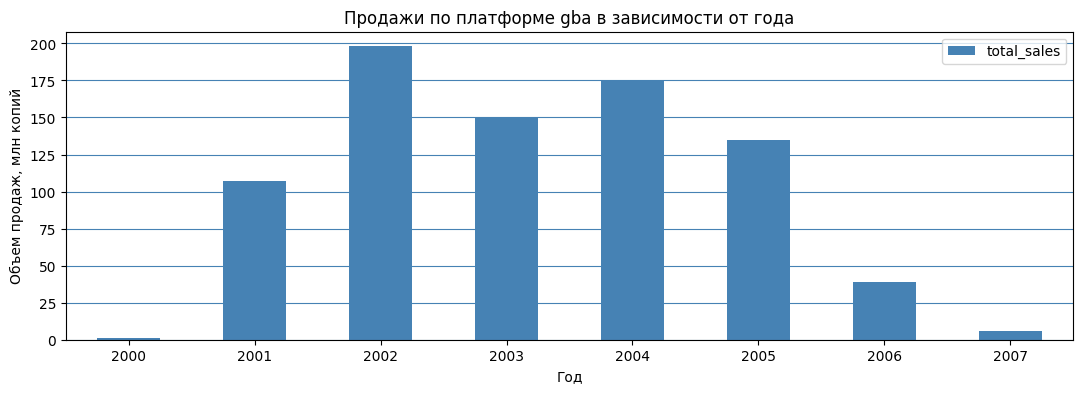

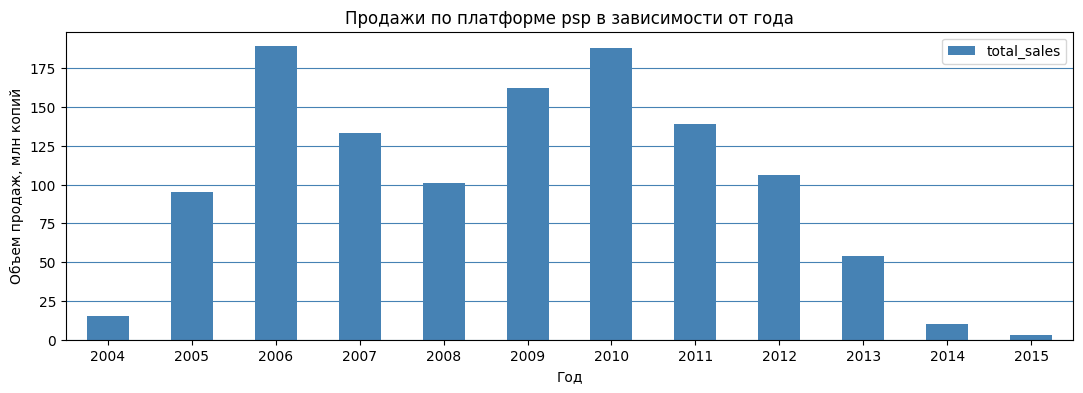

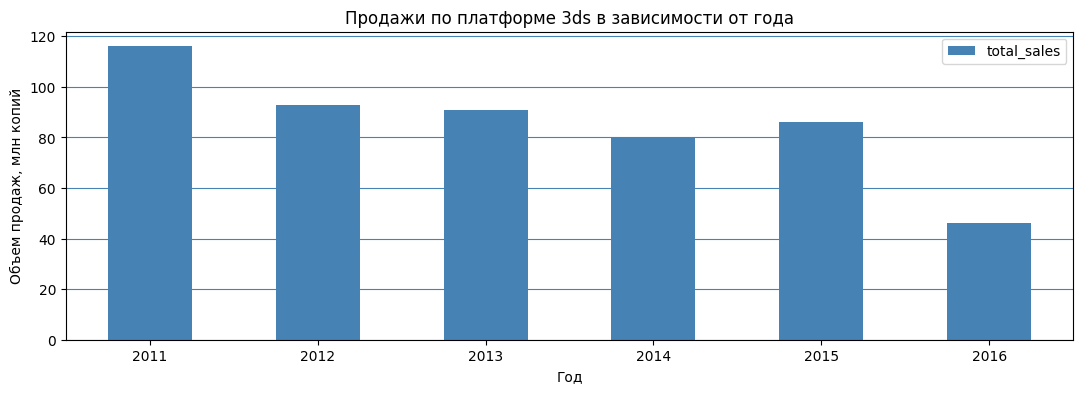

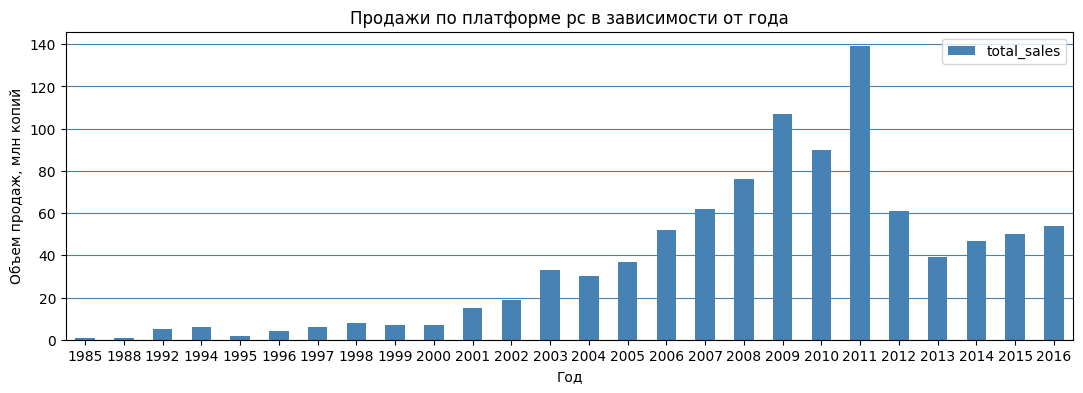

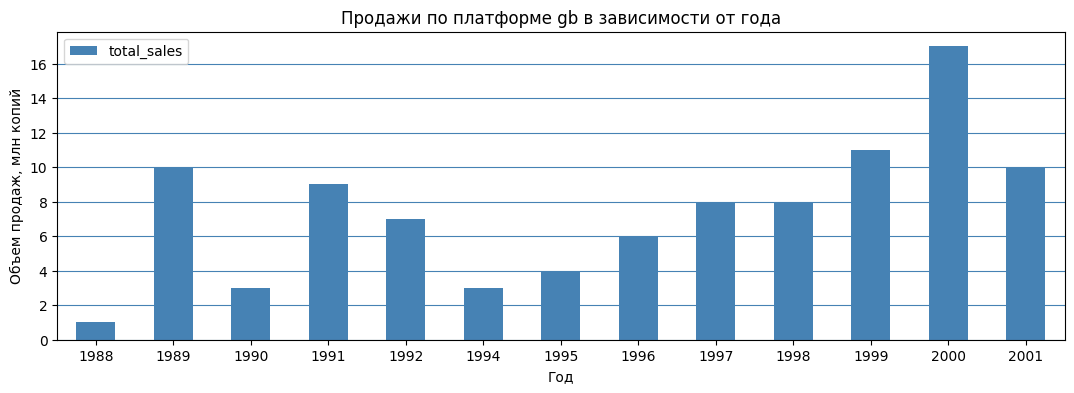

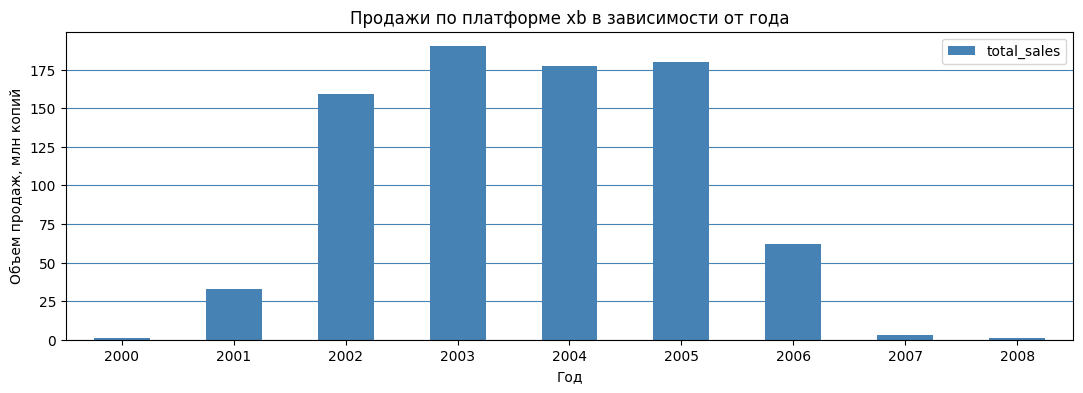

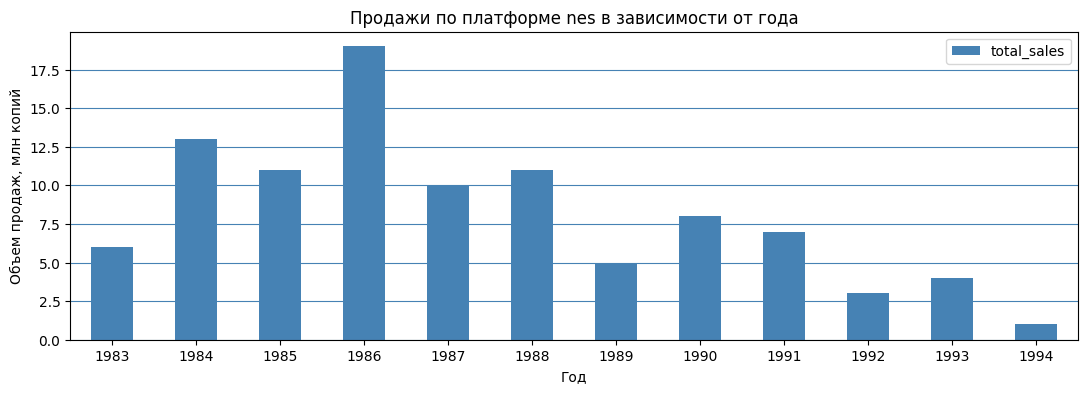

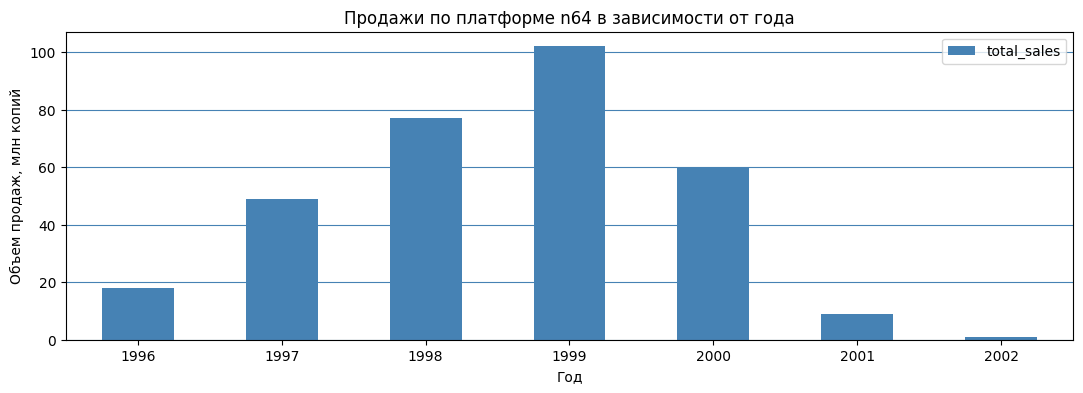

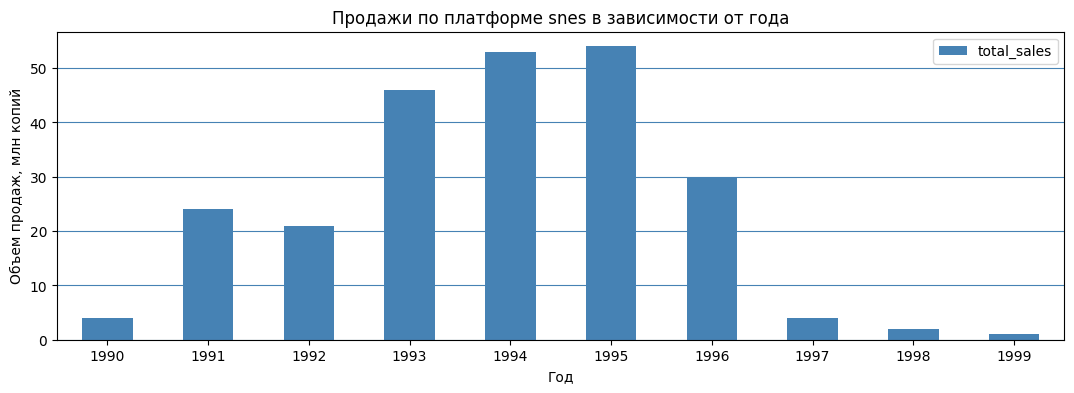

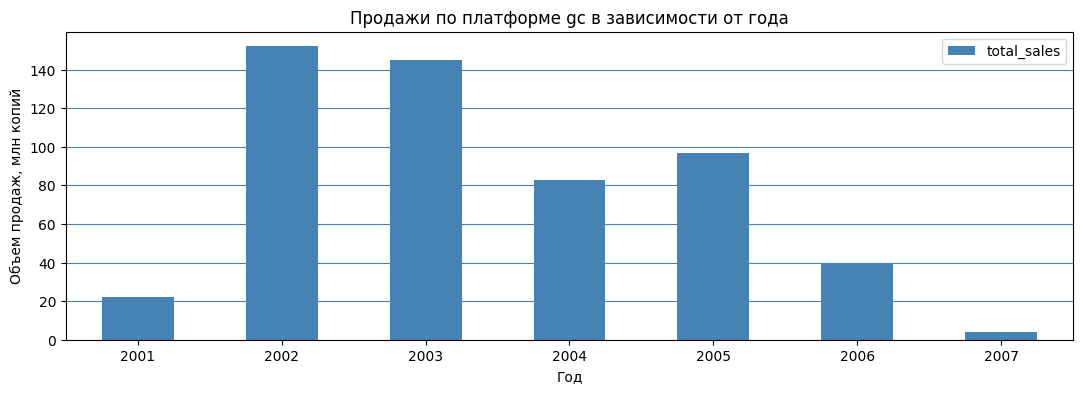

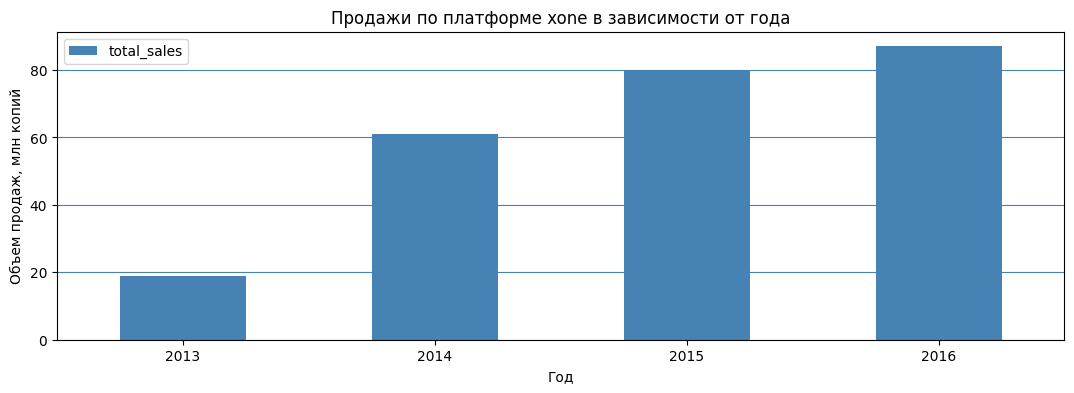

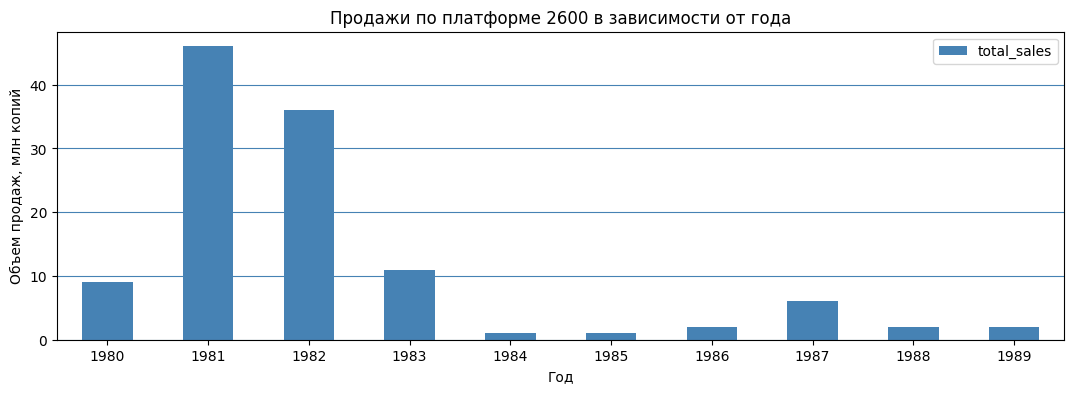

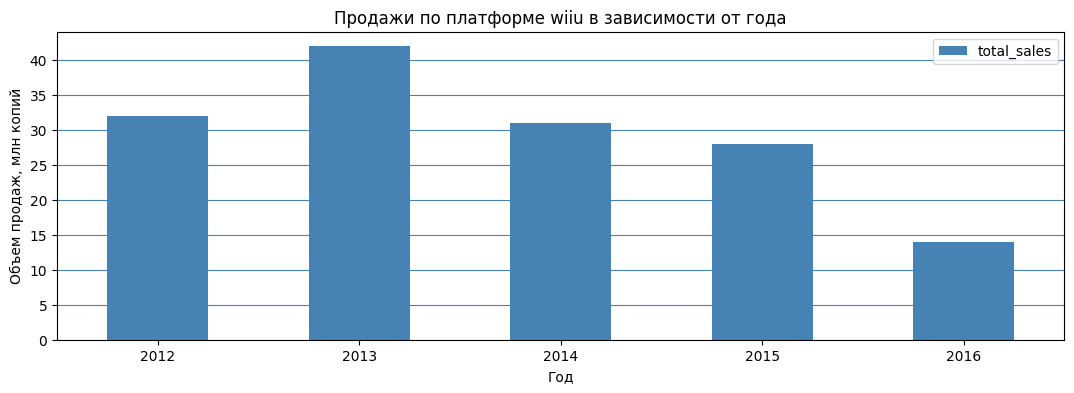

In [35]:
# построим распределения количество продаваемых игр по годам для 20ти наиболее популярных платформ.
for i in top_platform_sales.index[0:20]:
    games[games['platform'] == i].pivot_table(index='year_of_release', values='total_sales', aggfunc='count').plot(
    kind='bar', figsize=(13,4), color = '#4682B4')
    plt.title(f'Продажи по платформе {i} в зависимости от года')
    plt.xlabel('Год')
    plt.xticks(rotation=0)
    plt.ylabel('Объем продаж, млн копий')
    plt.grid(axis='y', color='#4682B4');
    

Отталкиваясь от полученных результатов, можно сделать вывод, что средний период жизни платформ длится 8-10 лет. Это также относится и к наиболее популярным платформам выявленным ранее. Скорее всего это причина в сменяемости поколений как видеоигр так и в большей части самих платформ. При этом анализ более ранних исторических данных врятли подойдет для анализа будущих периодов. Поэтому следующим этапом необходимо определить актуальный период для формирования прогнозов.

Nintendo DS вышла в 2004 году и данные о наличии игр за 1985 год для этой платформы очевидная аномалия. Удаляем:

In [36]:
# проверим сколько аномалий
len(games.query('platform == "ds" and year_of_release == 1985'))

1

In [37]:
# удаляем аномалию 1985 года у DS
len_before = len(games)
games = games.query('platform != "ds" or year_of_release != 1985 or year_of_release.isna()')
len_after = len(games)
print(f'Удалено аномалий 1985 года у DS: {len_before - len_after}')

Удалено аномалий 1985 года у DS: 1


In [38]:
# проверим самый ранный год для DS
games.query('platform == "ds"')['year_of_release'].min()

2004

### Какой период для анализа можно считать актаульным?

Учитывая срок жизни платформ и сменяемость поколений не стоит актуальный период определять как сам срок жизни платформ. Поэтому актуальным периодом определим период в 2-3 года. Для анализа данных и формирования прогнозов возмем данные за текущий год и 2 предыдущих.

In [39]:
# оставим данные только за актуальный период
relevant_games = games.query('year_of_release >= 2014')

# оценим размер актуальных данных
print('Доля актуальных данных: {:.1f}%.'.format(100 * len(relevant_games) / len(games)))

Доля актуальных данных: 10.1%.


### Какие платформы лидируют по продажам, растут или падают?

Выберем несколько потенциально прибыльных платформ. Для этого сгруппируем актуальные данные по платформам и найдем общий объем продаж по каждой из них

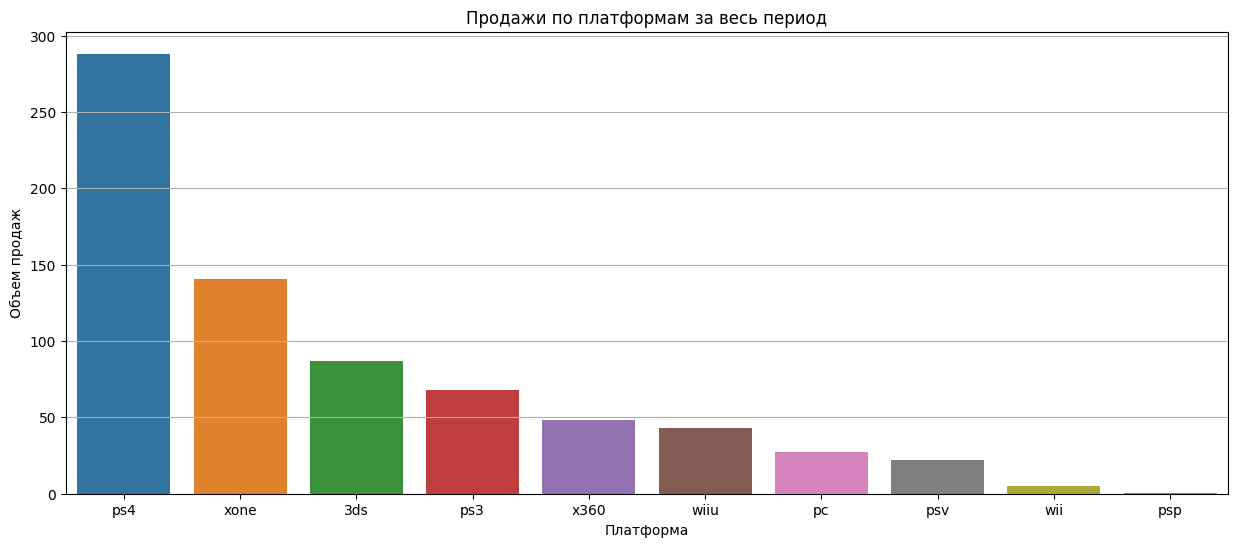

In [40]:
# визуализируем объем продаж по каждой из актуальных платформ
relevant_platform_sales = (
    relevant_games
    .groupby('platform')['total_sales'].sum()
    .sort_values(ascending=False)
    )

plt.figure(figsize=(15, 6))
plt.grid(True)
sns.barplot(x=relevant_platform_sales.index, y=relevant_platform_sales)
plt.title('Продажи по платформам за весь период')
plt.xlabel('Платформа')
plt.ylabel('Объем продаж');

Самой популярной платформой для видеоигр за последние 4 года оказалась PS4 - объем проданных копий для почти 300 млн. В Топ 5 лидеров рынка вошли:
- Play Station 4
- Xbox One
- Nintendo 3DS
- Play Station 3
- Xbox 360

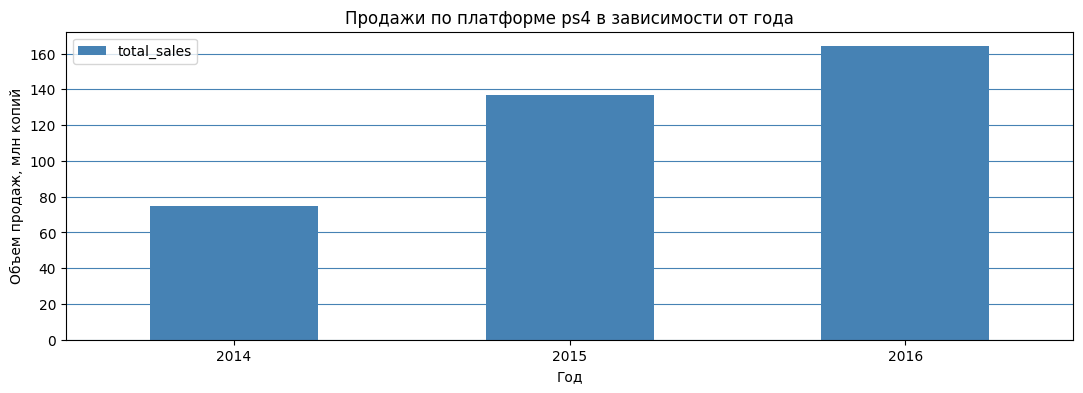

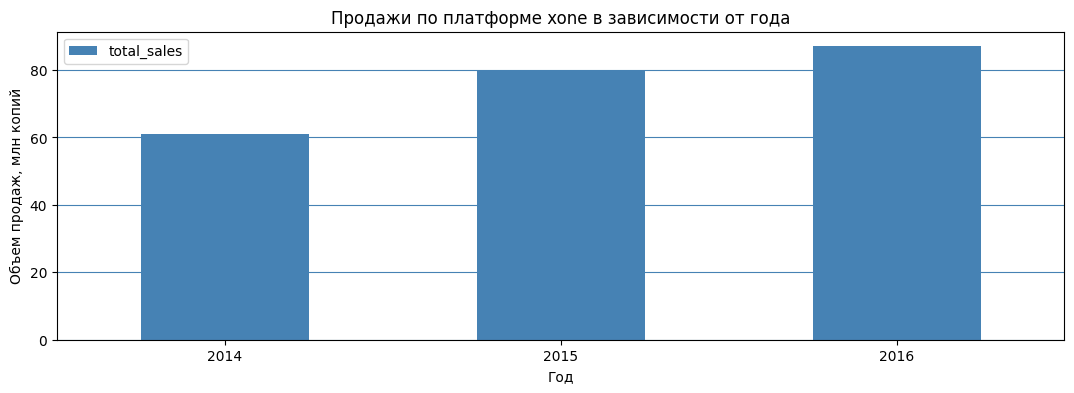

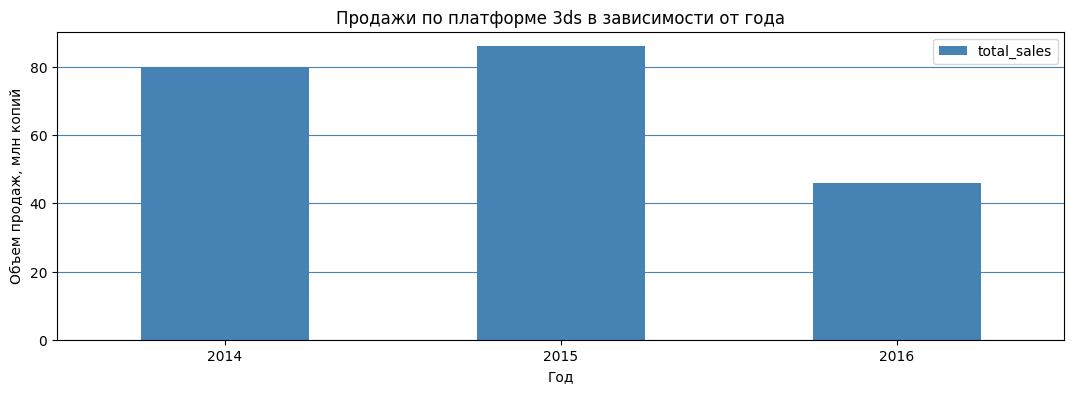

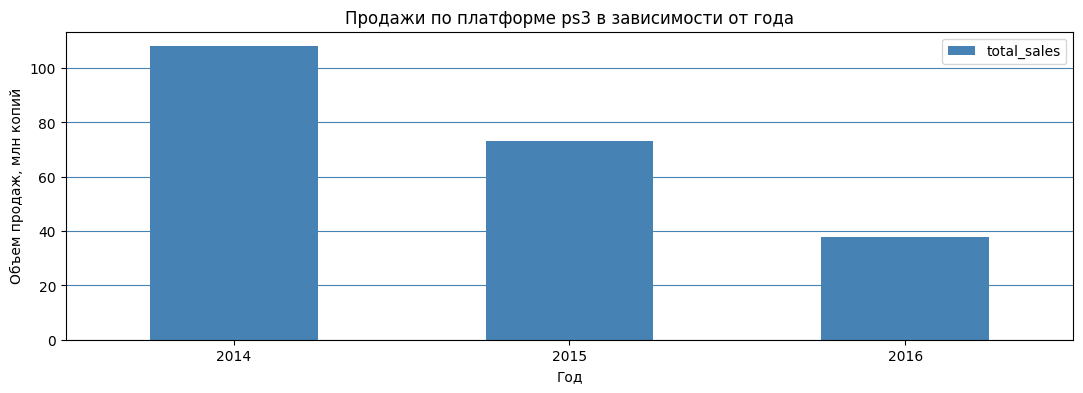

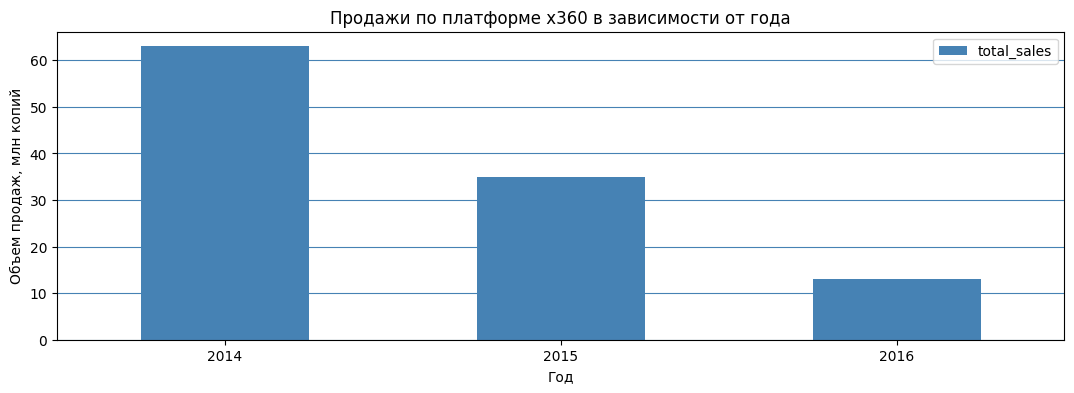

In [41]:
# построим распределения количества продаваемых игр по годам для лидеров рынка
for i in relevant_platform_sales.index[0:5]:
    relevant_games[relevant_games['platform'] == i].pivot_table(index='year_of_release', values='total_sales', aggfunc='count').plot(
    kind='bar', figsize=(13,4), color = '#4682B4')
    plt.title(f'Продажи по платформе {i} в зависимости от года')
    plt.xlabel('Год')
    plt.xticks(rotation=0)
    plt.ylabel('Объем продаж, млн копий')
    plt.grid(axis='y', color='#4682B4');
    

Устаревающие консоли сложно назвать перспективными, и хотя показатели объемов продаж находятся на высоком уровне, надеяться что выстрелят игры для "старых" платформ не стоит. При этом на смену платформы Wii U в 2017 году придет Nintendo Switch, которая была продемонстрирована в октябре 2016. А у оставшихся платформ показатели продаж сильно ниже чем у лидеров. Поэтому наиболее перспективными платформами можно считать:
        
- Play Station 4 (PS4)
- Xbox One
- Nintendo 3DS

Дополнительно проверим выбросы в данных о продажах игр за актуальный период у лидеров рынка

In [42]:
# выделим из датасета 5 лидеров рынка
top_relevant_sales = relevant_games.query('platform == @relevant_platform_sales.index[0]'
                                          'or platform == @relevant_platform_sales.index[1]'
                                          'or platform == @relevant_platform_sales.index[2]'
                                          'or platform == @relevant_platform_sales.index[3]'
                                          'or platform == @relevant_platform_sales.index[4]')

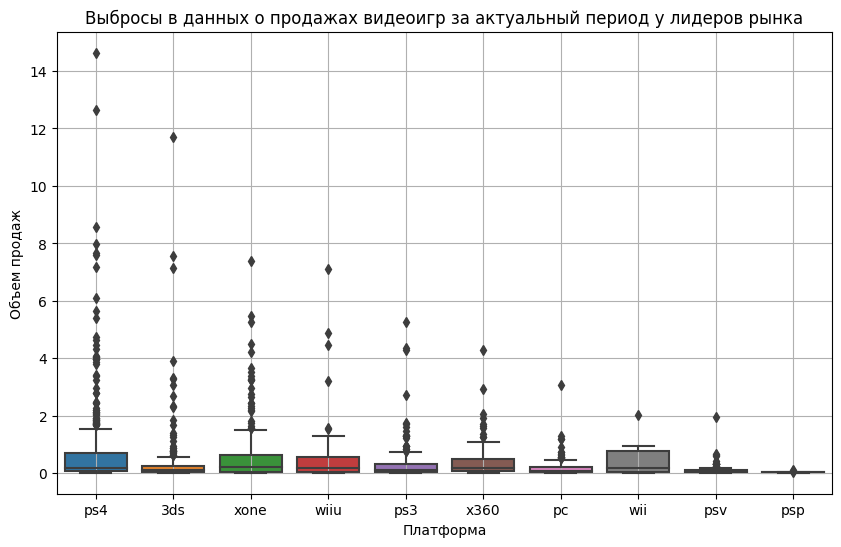

In [43]:
# построим и изучим диаграмму размаха по 'total_sales'
plt.figure(figsize=(10, 6))
sns.boxplot(data = relevant_games, y = 'total_sales', x='platform')
plt.grid(True)
ax = plt.gca()
plt.title('Выбросы в данных о продажах видеоигр за актуальный период у лидеров рынка')
plt.xlabel('Платформа')
plt.ylabel('Объем продаж');

Максимальные значения объемов продаж видеоигр для Play Station 4 достигают значений более 14 млн копий игры, Nintendo 3DS - почти 12 млн копий, Xbox One - ~ 7,5 млн копий. Для платформы Wii U объемы продаж видео игр достигают 7 млн копий, но таких игр единицы. Для платформ Play Station 3 и Xbox 360 объемы продаж достигают значений ~5,5 млн и ~4,1 млн копий соответственно, а для PC - до 3х млн копий.

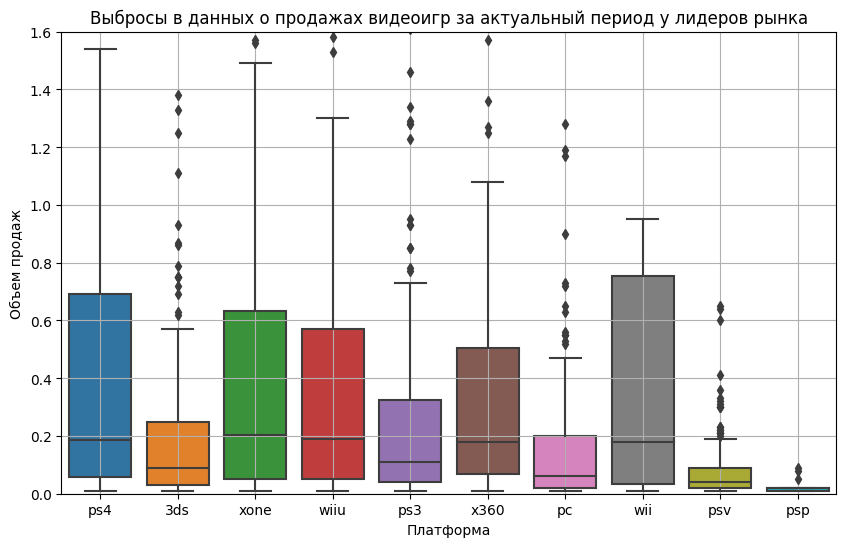

In [44]:
# построим и изучим диаграмму размаха по 'total_sales' на меньшем масштабе
plt.figure(figsize=(10, 6))
sns.boxplot(data = relevant_games, y = 'total_sales', x='platform')
plt.grid(True)
ax = plt.gca()
ax.set_ylim([0, 1.6])
plt.title('Выбросы в данных о продажах видеоигр за актуальный период у лидеров рынка')
plt.xlabel('Платформа')
plt.ylabel('Объем продаж');

С учетом того что консоли Play Station 3 и  Xbox 360 - консоли прошлого поколения, они занимают значительную долю объемов продаж видеоигр в период с 2014 по 2016 года. При этом следует выделить потенциально прибыльных конкурентов, которые только набирают свою популярность - Play Station 4 и Xbox One.

Большая часть видеоигр (75%) для Play Station 4 продаются объемом до 700 тыс копий. Аналогично для Nintendo 3DS - до ~250 тыс копий, для Xbox One - до ~ 620 тыс копий, для Wii U - до ~ 590 тыс копий, Play Station 3 и Xbox 360 - до ~ 310 тыс и 500 тыс копий соответственно. При этом медианное значение объемов продаж для платформ следующее:

- Play Station 4 ~ 200 тыс копий
- Nintendo 3DS ~ 100 тыс копий
- Xbox One ~ 210 тыс копий
- Wii U ~ 200 тыс копий
- Play Station 3 ~ 100 тыс копий
- Xbox 360 ~ 190 тыс копий

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?

Для ответа на этот вопрос построим диаграмму рассеяния для оценки зависимости объема продаж видеоигр от оценки критиков и от оценки игроков внутри одной платформы (Play Station 4). Выводы подкрепим расчетом корреляции и соотнесем  выводы с продажами игр на других платформах.

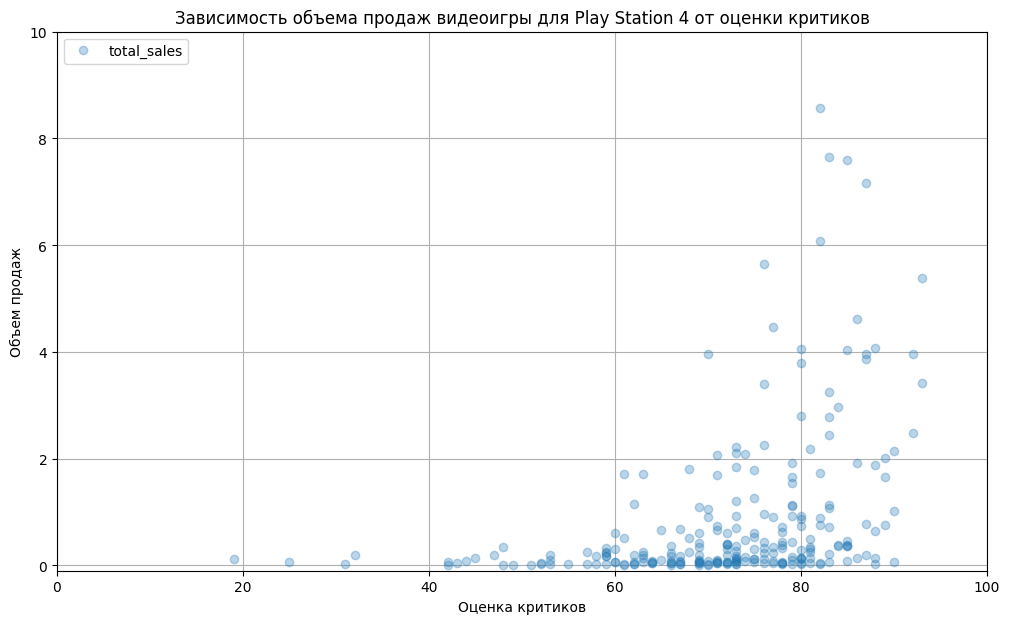

In [45]:
# построим график зависимости объема продаж виеоигр от оценки критиков для платформы PS4
(
    top_relevant_sales.loc[top_relevant_sales['platform'] == 'ps4'].plot(
    x='critic_score', y='total_sales', grid=True, style='o', figsize=(12, 7), alpha=0.3)
)
ax = plt.gca()
ax.set_xlim([0, 100])
ax.set_ylim([-0.1, 10])
plt.title('Зависимость объема продаж видеоигры для Play Station 4 от оценки критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Объем продаж');

Зависимость объема продаж видеоигр от оценки критиков прослеживается, но при этом остается довольно слабой. Проверим график зависимости объема продаж от оценки игроков.

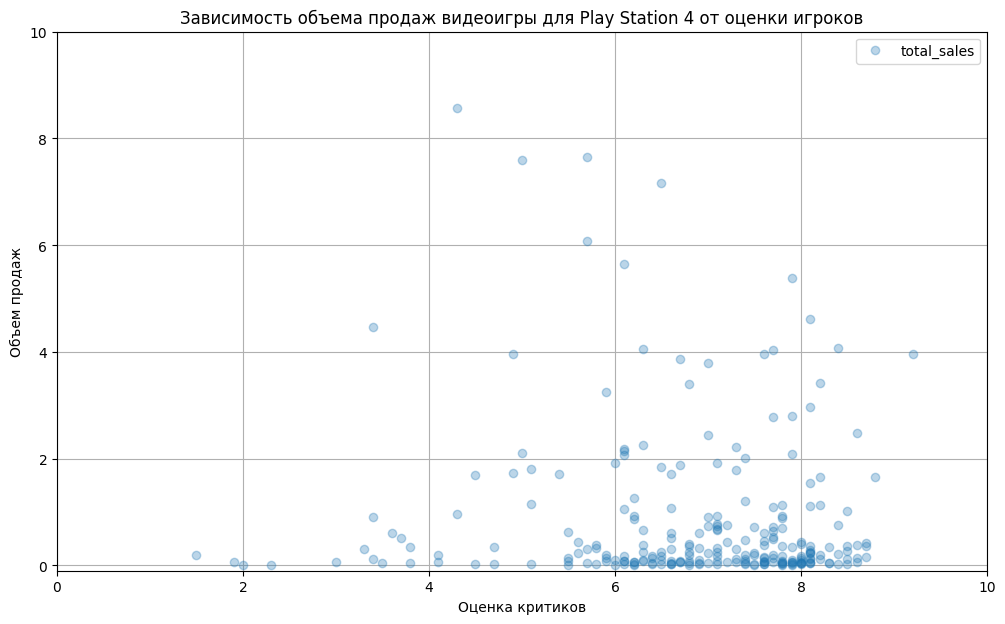

In [46]:
# построим график зависимости объема продаж виеоигр от оценки игроков для платформы PS4
(
    top_relevant_sales.loc[top_relevant_sales['platform'] == 'ps4'].plot(
    x='user_score', y='total_sales', grid=True, style='o', figsize=(12, 7), alpha=0.3)
)
ax = plt.gca()
ax.set_xlim([0, 10])
ax.set_ylim([-0.1, 10])
plt.title('Зависимость объема продаж видеоигры для Play Station 4 от оценки игроков')
plt.xlabel('Оценка критиков')
plt.ylabel('Объем продаж');

Ситуация очень похожа на прошлую, зависимость объема продаж видеоигр от оценки игроков прослеживается, но при этом нельзя утверждать что эта зависимость значительная. Проверим выводы с помощью корреляции.

In [47]:
# посчитаем корреляцию между объемом продаж видеоигр и оценками критиков и игроков для платформы PS4
cor = top_relevant_sales[['platform', 'total_sales', 'critic_score', 'user_score']].loc[(top_relevant_sales['platform'] == 'ps4') ].corr()
cor['total_sales'].sort_values(ascending=False)

total_sales     1.000000
critic_score    0.402661
user_score     -0.040132
Name: total_sales, dtype: float64

Значения корреляции подтверждают наши выводы: 
- Сильной зависимости между объемом продаж видеоигр от оценки критиков и от оценки игроков нет

Соотнесем выводы с продажами игр на других платформах

In [48]:
# cоздадим словарь для форматирования графиков зависимости
row= {
    'ps3': ['Play Station 3', 'g'],
    'xone': ['Xbox One', 'm'],
    '3ds': ['Nintendo 3DS', 'y'],
    'x360': ['Xbox 360', 'r']
}

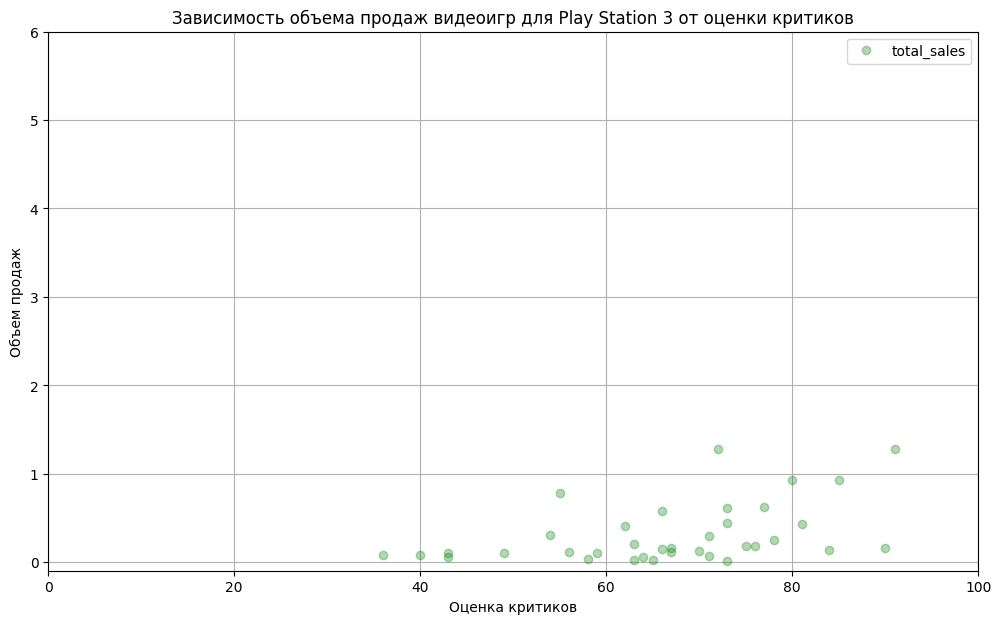

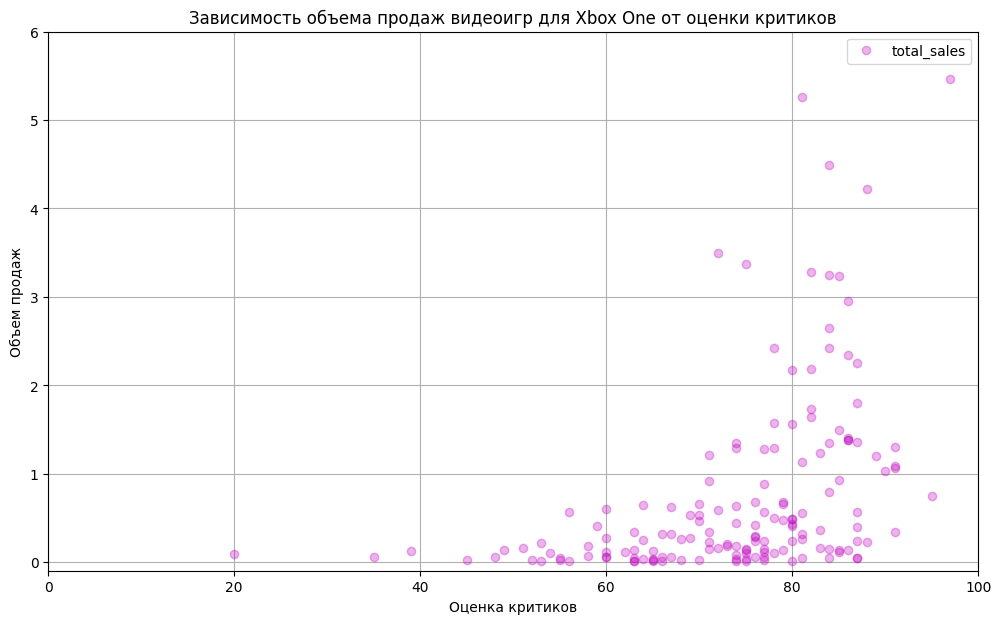

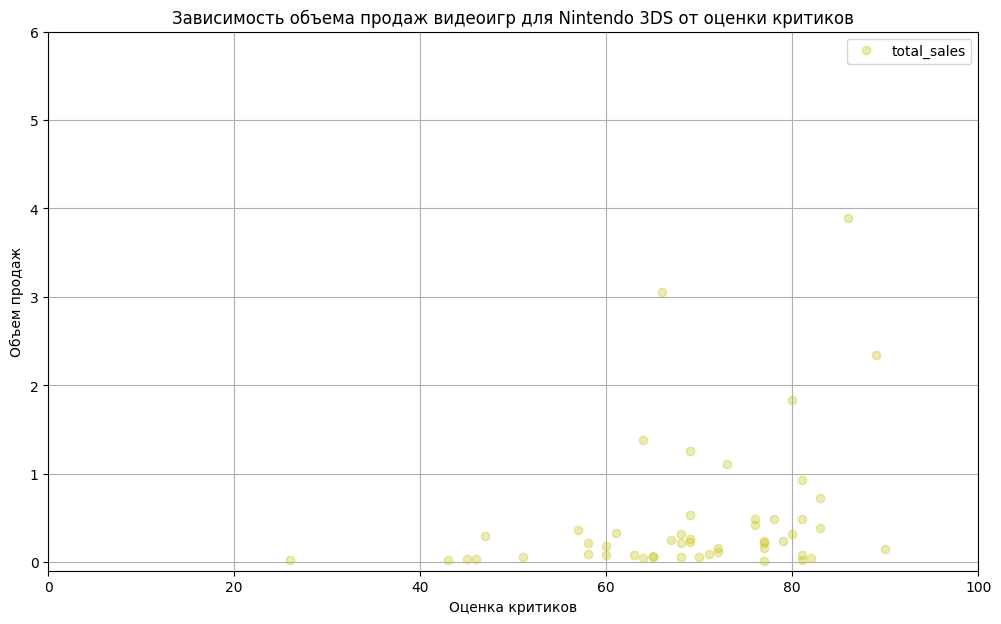

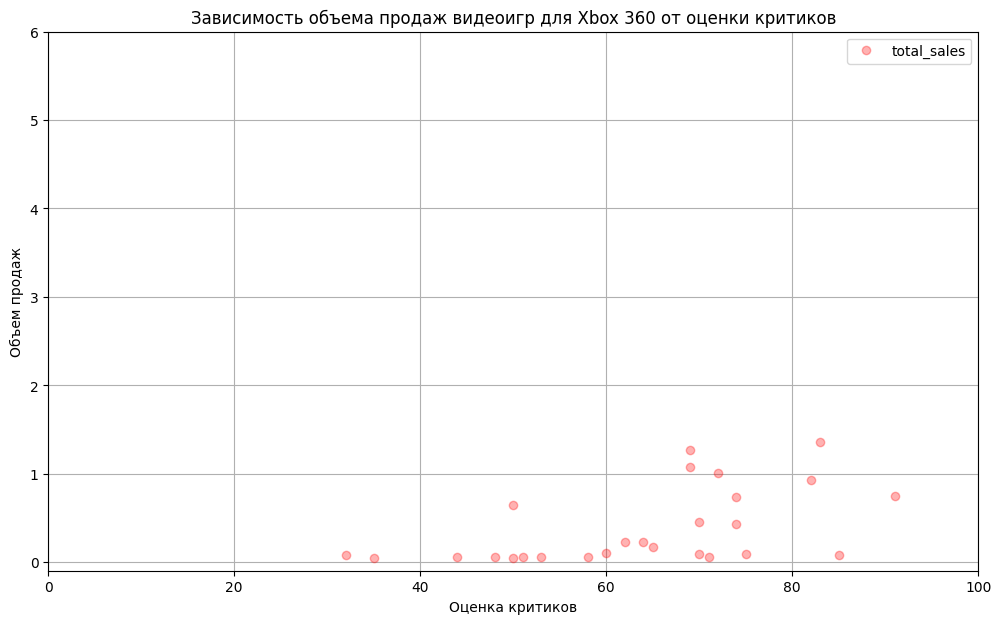

In [49]:
# и циклом построим графики зависимости объема продаж виеоигр от оценки критиков
for i, n in row.items():
    (
        top_relevant_sales.loc[top_relevant_sales['platform'] == i].plot(
        x='critic_score', y='total_sales', grid=True, style='o', figsize=(12, 7), color=n[1], alpha=0.3)
    )
    ax = plt.gca()
    ax.set_xlim([0, 100])
    ax.set_ylim([-0.1, 6])
    plt.title(f'Зависимость объема продаж видеоигр для {n[0]} от оценки критиков')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Объем продаж');

Ситуация идентична

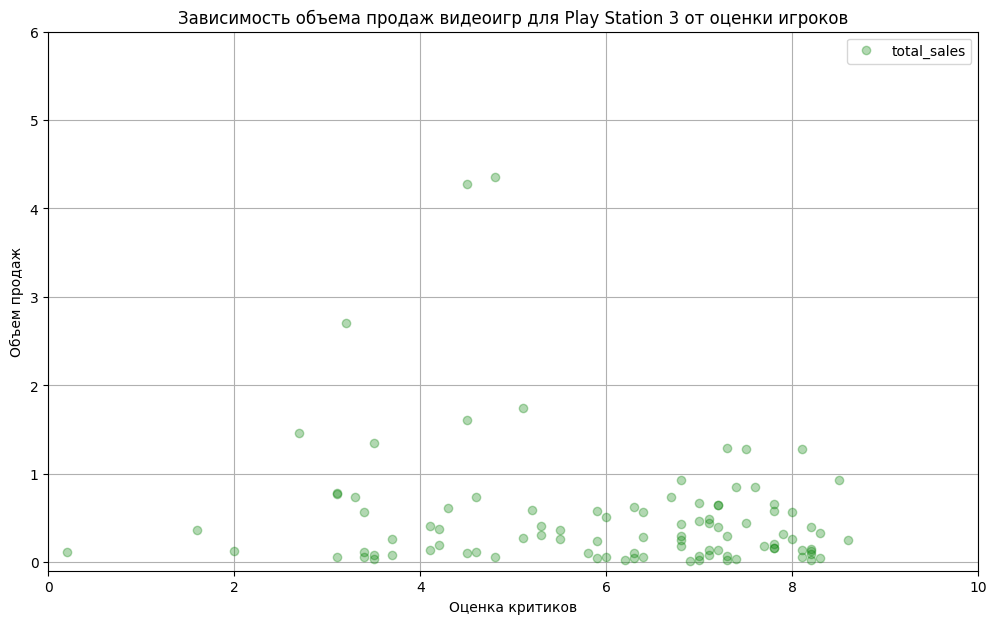

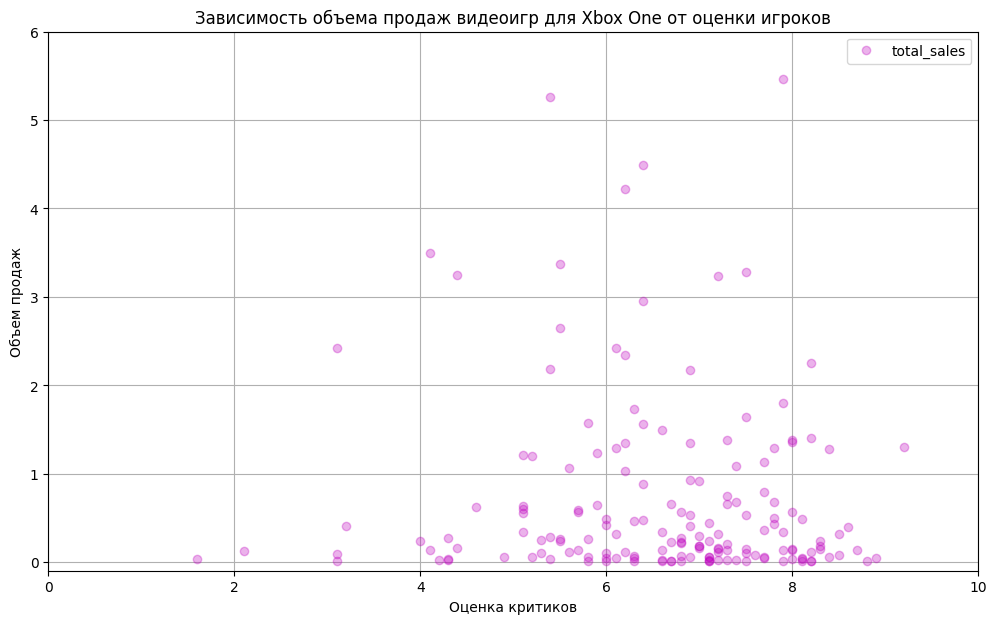

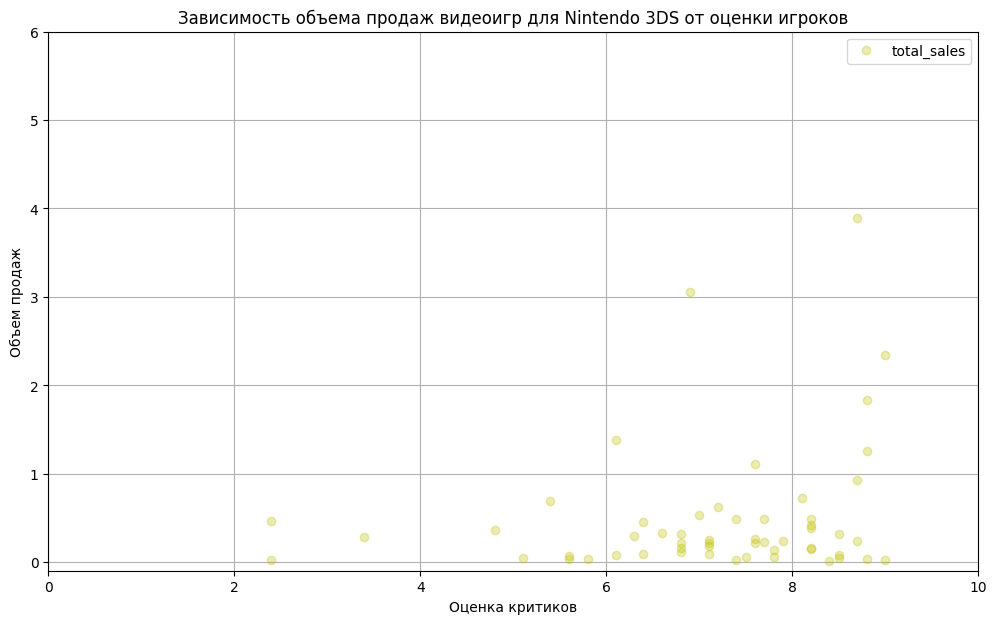

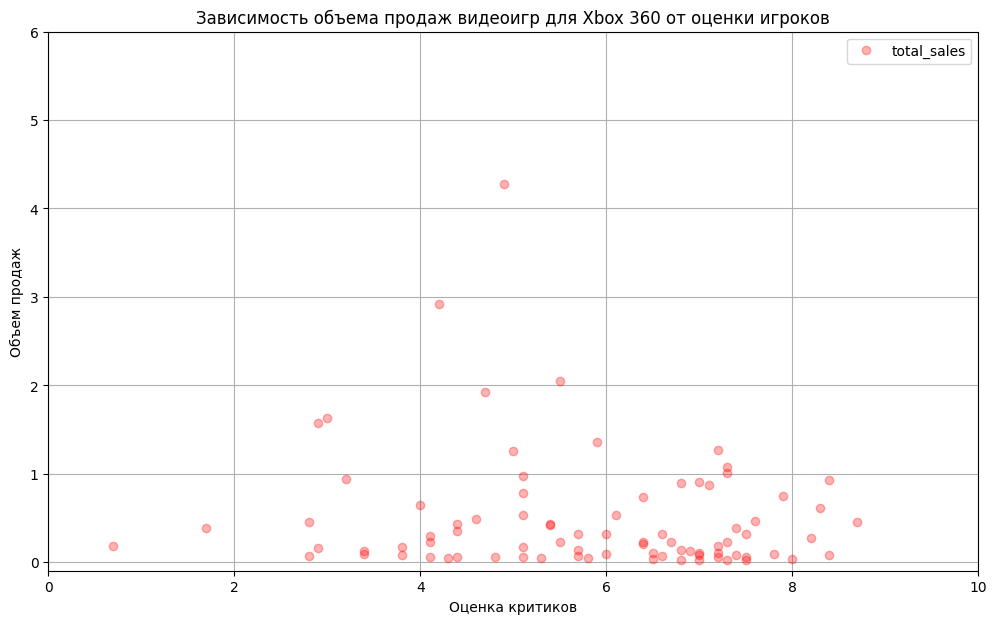

In [50]:
# иклом построим графики зависимости объема продаж виеоигр от оценки игроков
for i, n in row.items():
    (
        top_relevant_sales.loc[top_relevant_sales['platform'] == i].plot(
        x='user_score', y='total_sales', grid=True, style='o', figsize=(12, 7), color=n[1], alpha=0.3)
    )
    ax = plt.gca()
    ax.set_xlim([0, 10])
    ax.set_ylim([-0.1, 6])
    plt.title(f'Зависимость объема продаж видеоигр для {n[0]} от оценки игроков')
    plt.xlabel('Оценка критиков')
    plt.ylabel('Объем продаж');

In [51]:
# посчитаем корреляцию между объемом продаж видеоигр и оценками критиков и игроков для платформы PS4
for i, n in row.items():
    cor = (top_relevant_sales[['platform', 'total_sales', 'critic_score', 'user_score']]
           .loc[(top_relevant_sales['platform'] == i) ].corr())
    print(f'\nКорреляция между объемом продаж видеоигр и оценками критиков и игроков для платформы {n[0]}:')
    print(cor['total_sales'].sort_values(ascending=False))
    


Корреляция между объемом продаж видеоигр и оценками критиков и игроков для платформы Play Station 3:
total_sales     1.000000
critic_score    0.446575
user_score     -0.166761
Name: total_sales, dtype: float64

Корреляция между объемом продаж видеоигр и оценками критиков и игроков для платформы Xbox One:
total_sales     1.000000
critic_score    0.428677
user_score     -0.070384
Name: total_sales, dtype: float64

Корреляция между объемом продаж видеоигр и оценками критиков и игроков для платформы Nintendo 3DS:
total_sales     1.000000
critic_score    0.314118
user_score      0.215193
Name: total_sales, dtype: float64

Корреляция между объемом продаж видеоигр и оценками критиков и игроков для платформы Xbox 360:
total_sales     1.000000
critic_score    0.525723
user_score     -0.138445
Name: total_sales, dtype: float64


Выводы подтверждены:
- Отзывы пользователей и критиков на объем продаж внутри платформ влияют очень незначительно либо не влияют вовсе

### Что можно сказать про общее распределение игр по жанрам?

Для оценки распределения игр по жанрам сгруппируем данные по жанрам и посчитаем количество игр и объем проданых копий для каждой платформы

In [52]:
# создадим сводную таблицу
genre_distr = (
    relevant_games.pivot_table(
    index=['genre', 'platform'],
    values = ['name', 'total_sales'],
    aggfunc = {
        'name': len,
        'total_sales': sum,
    }).reset_index()
)

# переименуем колонки
genre_distr.columns = ['genre', 'platform', 'count', 'total_sales']

# посомтрим на результат, например, по жанру action
genre_distr.loc[genre_distr['genre'] == 'action'].sort_values(by='total_sales', ascending=False)

,genre,platform,count,total_sales
3,action,ps4,142,91.620003
9,action,xone,81,31.059999
0,action,3ds,87,22.059999
2,action,ps3,77,18.100000
8,action,x360,35,12.330000
7,action,wiiu,35,9.990000
5,action,psv,111,7.470000
1,action,pc,39,5.340000
6,action,wii,6,1.190000
4,action,psp,6,0.200000


In [53]:
# изучим суммарный объем продаж игр разных жанров
total_genre_distr = genre_distr.groupby('genre')[['count', 'total_sales']].sum().reset_index()
genre_distr_sales = total_genre_distr.sort_values(by='total_sales', ascending=False)
genre_distr_sales

,genre,count,total_sales
0,action,619,199.360001
8,shooter,128,170.940002
10,sports,161,109.479996
7,role-playing,221,101.440002
3,misc,113,37.549999
2,fighting,60,28.219999
6,racing,69,27.520000
4,platform,38,18.090000
1,adventure,185,17.549999
9,simulation,44,13.130000


Подкрепим данные визуализацией

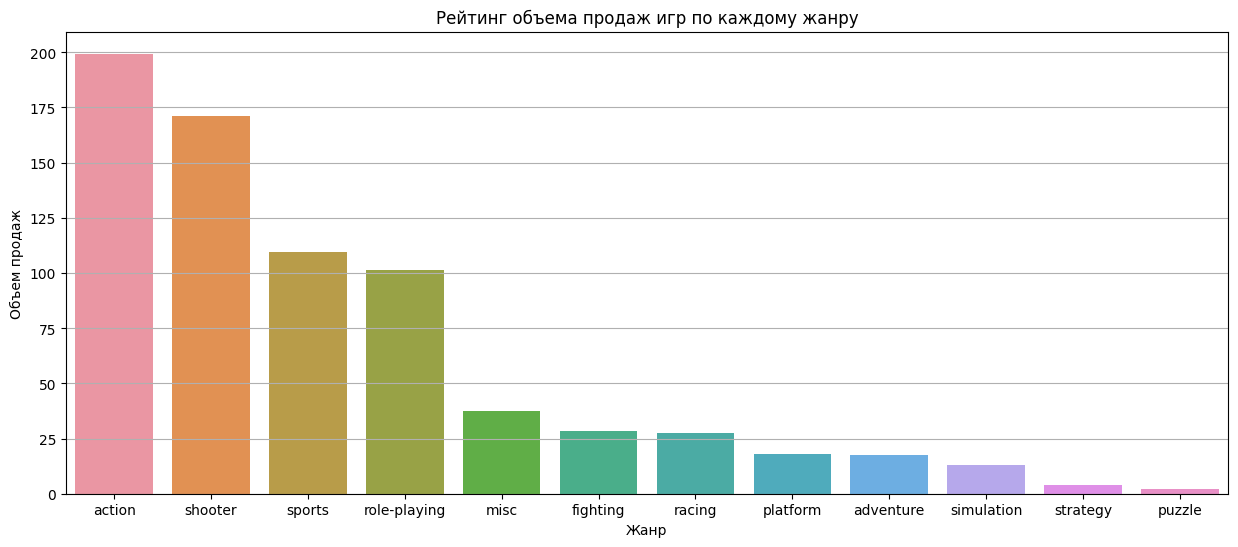

In [54]:
# визуализируем
plt.figure(figsize=(15, 6))
plt.grid(True)
sns.barplot(x=genre_distr_sales['genre'], y=genre_distr_sales['total_sales'])
plt.title('Рейтинг объема продаж игр по каждому жанру')
plt.xlabel('Жанр')
plt.ylabel('Объем продаж');

Самые продаваемые жанры:
- action
- shooter
- sports
- role-playing(rpg)

Жанр puzzle имеет минимальный объем продаж их всех жанров, за период с 2013 по 2016 год продано всего 3,17 миллиона копий.

Изучим распределения количества выпущенных игр

In [55]:
# остортируем данные по количеству выпущенных игр
genre_distr_count = total_genre_distr.sort_values(by='count', ascending=False)
genre_distr_count

,genre,count,total_sales
0,action,619,199.360001
7,role-playing,221,101.440002
1,adventure,185,17.549999
10,sports,161,109.479996
8,shooter,128,170.940002
3,misc,113,37.549999
6,racing,69,27.520000
2,fighting,60,28.219999
9,simulation,44,13.130000
4,platform,38,18.090000


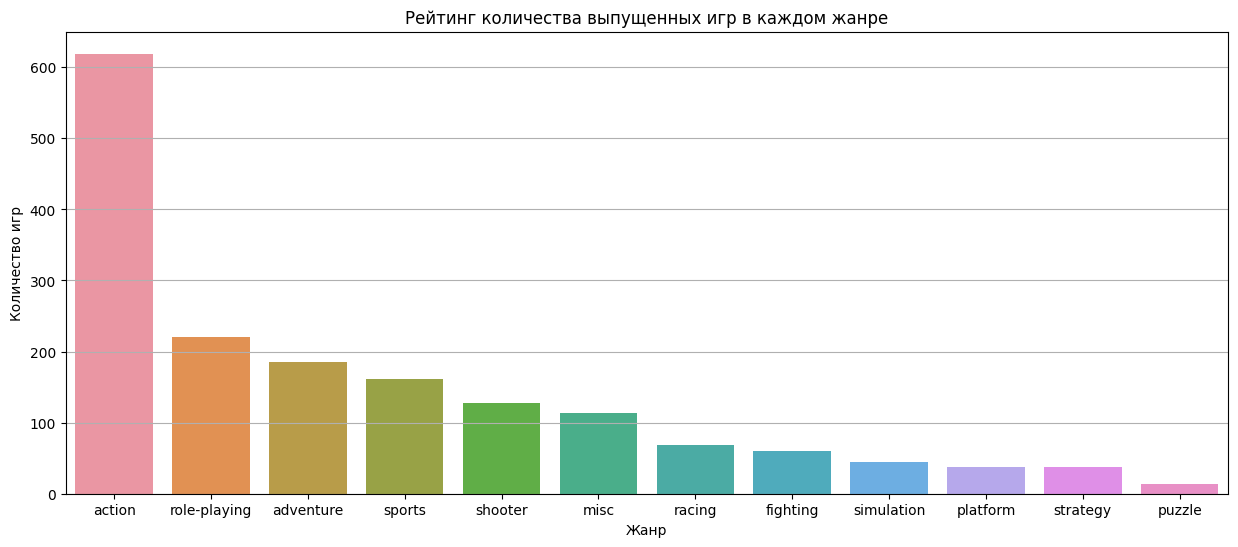

In [56]:
# визуализируем
plt.figure(figsize=(15, 6))
plt.grid(True)
sns.barplot(x=genre_distr_count['genre'], y=genre_distr_count['count'])
plt.title('Рейтинг количества выпущенных игр в каждом жанре')
plt.xlabel('Жанр')
plt.ylabel('Количество игр');

Ситуация становится интереснее: объем проданых копий не так сильно зависит от количества выпущенных игр. Так игры в жанре rpg занимают 4 место по объему проданных копий, но по количеству выпскаемых игр жанр rpg занимает почетное 2ое место, яркий пример того что больше не значит лучше. 

Посчитаем объем проданых копий в среднем на одну выпущенную игру в каждом жанре:

In [57]:
# добавим новый параметр в данные
genre_distr_sales['ratio'] = genre_distr_sales['total_sales'] / genre_distr_sales['count']
genre_distr_ratio = genre_distr_sales.sort_values(by='ratio', ascending=False)
genre_distr_ratio

,genre,count,total_sales,ratio
8,shooter,128,170.940002,1.335469
10,sports,161,109.479996,0.680000
4,platform,38,18.090000,0.476053
2,fighting,60,28.219999,0.470333
7,role-playing,221,101.440002,0.459005
6,racing,69,27.520000,0.398841
3,misc,113,37.549999,0.332301
0,action,619,199.360001,0.322068
9,simulation,44,13.130000,0.298409
5,puzzle,14,2.210000,0.157857


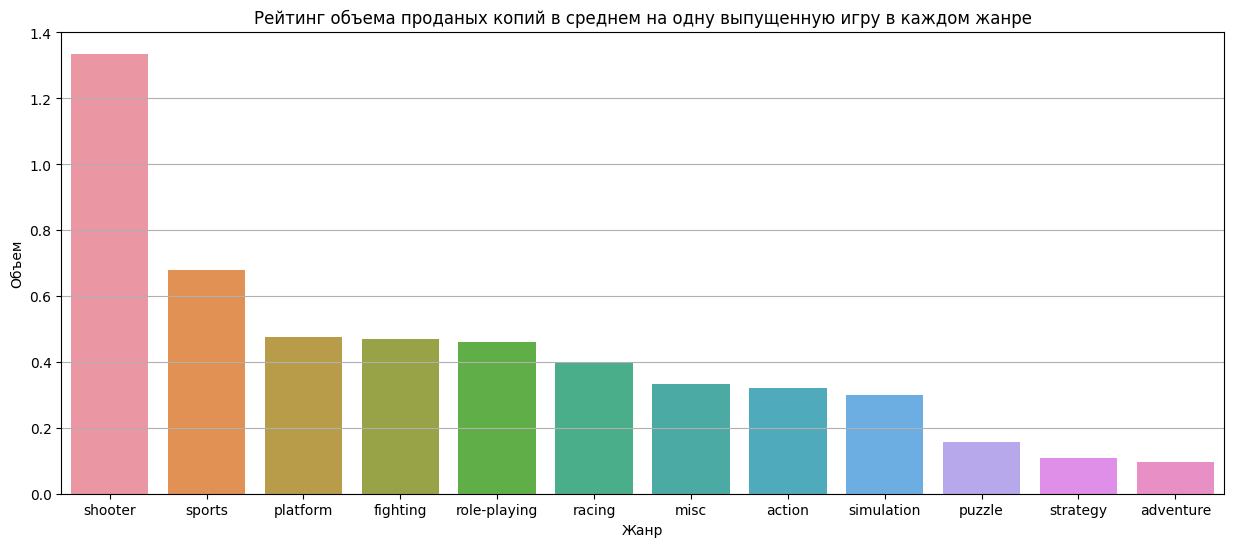

In [58]:
# визуализируем
plt.figure(figsize=(15, 6))
plt.grid(True)
sns.barplot(x=genre_distr_ratio['genre'], y=genre_distr_ratio['ratio'])
plt.title('Рейтинг объема проданых копий в среднем на одну выпущенную игру в каждом жанре')
plt.xlabel('Жанр')
plt.ylabel('Объем');

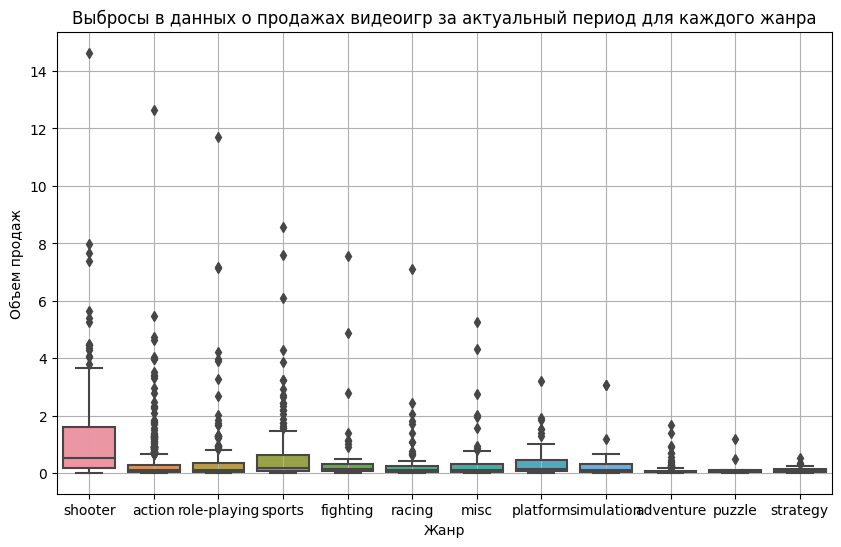

In [59]:
# построим и изучим диаграмму размаха по 'total_sales' для жанров
plt.figure(figsize=(10, 6))
sns.boxplot(data = relevant_games, y = 'total_sales', x='genre')
plt.grid(True)
plt.title('Выбросы в данных о продажах видеоигр за актуальный период для каждого жанра')
plt.xlabel('Жанр')
plt.ylabel('Объем продаж');

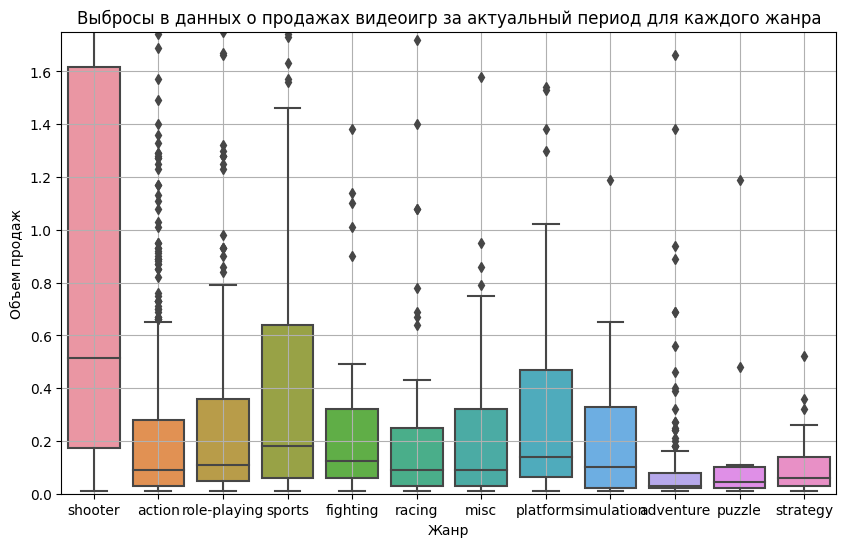

In [60]:
# построим и изучим диаграмму размаха по 'total_sales' для жанров на меньшем масштабе
plt.figure(figsize=(10, 6))
sns.boxplot(data = relevant_games, y = 'total_sales', x='genre')
plt.grid(True)
ax = plt.gca()
ax.set_ylim([0, 1.75])
plt.title('Выбросы в данных о продажах видеоигр за актуальный период для каждого жанра')
plt.xlabel('Жанр')
plt.ylabel('Объем продаж');

Выводы подтверждаются. "Sooter" значительно опережает своих жанровых конкурентов по показателям продаж с медианным объемом проданых копий более 500 тыс. На втором месте по объему продаваемых копий можно выделить жанр "Sports" с медианным значением объема продаж ~ 190 тыс копий, тройку лидеров закрывает "Platform" с медианным значением объема продаж ~ 150 тыс копий.

- Наиболее перспективным жанром является shooter


- В Топ-3 жанра по объему проданых копий в среднем на одну выпущенную игру вошли
  - Shooter
  - Sports
  - Platform


- Наименее перспективные жанры
  - Puzzle
  - Strategy
  - Adventure

### Результаты исследовательского анализа данных

- Стабильный рост объема выпускаемых игр наблюдается с 1991 года. Стремительное увеличение выпускаемых игр приходится на 2001 


- 2002 года, после следующих пары лет (2003-2004 года) объем выпускаемых игр ежегодно увеличивается вплоть до 2008 - 2009 годов. Пик популярности игр как раз приходится на 2008 - 2009 года после чего наблюдается резкое снижение объема выпускаемых ежегодно игр. Вожможно пользователи стали более выборочны и придирчивы к различным играм и разработчикам пришлось сосредоточиться на качестве выпускаемых игр а не на их количестве


- Средний период жизни платформ длится 8-10 лет. Скорее всего это причина в сменяемости поколений как видеоигр так и в большей части самих платформ. Поэтому актуальным периодом для анализа данных был определен период в 3 года, включая текущий год


- Самой популярной платформой для видеоигр за последние 4 года оказалась PS4 - объем проданных копий для нее почти 300 млн. В Топ 5 лидеров рынка вошли:

     - **Play Station 4 (PS4)** — явный лидер на рынке и ежегодно популярность видеоигр для этой платформы только растет
     - **Play Station 3 (PS3)** — прошлое поколение консолей Play Station, на смену которому пришла PS4, показывает отрицательную динамику с каждым годом. Возможно до заката Play Station 3 осталось не так много времени, учитывая что пик популярности PS3 был в 2011 году
     - **Xbox One** — показывает ту же динамику что и PS4, это не удиветельно ведь эти консоли одного поколения и вышли в один год (2013), но в плане абсолютных объемов вышедших видеоигр, Xbox One значительно уступает своему конкуренту - PS4
     - **Nintendo 3DS** — платформа, которая показывает самые стабильные результаты с момента своего выхода в 2011 году. При этом объемы вышедших видеоигр для консоли Nintendo 3DS хоть и стабильны, но все же с каждым годом снижаются. Явных конкурентов у консоли Nintendo 3DS нет, ведь это портативная а не стационарная консоль. При этом данные за 2016 год могут быть не полными.
     - **Xbox 360** — прошлое поколение консолей Xbox, на смену которому пришла Xbox One, показывает отрицательную динамику с каждым годом и ситуация абсолютна идентична консолям PS3 - PS4. По всей вероятности до заката Xbox 360 осталось времени не больше чем у PS3, пик популярности Xbox 360 также приходится на 2011 год


- При этом Xbox 360 и Play Station 3 уже исполнилось 11 лет и они с малой вероятностью станут перспективными или сохранят продажи в 2017 году. При этом на смену платформы Wii U в 2017 году придет Nintendo Switch, которая была продемонстрирована в октябре 2016. А у оставшихся платформ показатели продаж сильно ниже чем у лидеров. Поэтому наиболее перспективными платформами можно считать:
    - **Play Station 4 (PS4)**
    - **Xbox One**
    - **Nintendo 3DS**


- Отзывы пользователей и критиков на объем продаж внутри платформ влияют очень незначительно либо не влияют вовсе


- В Топ-3 жанра по объему проданых копий в среднем на одну выпущенную игру вошли
    - Shooter
    - Sports
    - Platform
     
- Наименее перспективные жанры
    - Puzzle
    - Strategy
    - Adventure

## Портрет пользователя каждого региона

### Формирование портрета пользователей для каждого региона

Составим портрет пользователя для каждого региона, для этого определим:

- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Для удобства создадим функции, которые на вход будут принимать датасет и интересующий нас регион и выводить графики с наиболее популярными платформами и жанрами для каждого региона.

In [61]:
# создадим функцию для поиска топ-5 платформ в регионах
def top_5_platform_for_region(data, region):
    
    # cоздадим словарь для форматирования графиков
    row= {
        'na_sales': 'Серевной Америке',
        'eu_sales': 'Европе',
        'jp_sales': 'Японии',
        'other_sales': 'других странах'
    }
    
    # сгруппируем данные по платформам и найдем топ 5 платформ по объему продаж для выбранного региона
    platform_top_5 = (
        data
        .groupby('platform')[region].sum()
        .sort_values(ascending=False).head(5))
    
    # зададим цвет для форматирования графиков
    colors = ['#00CED1', '#87CEFA', '#87CEEB', '#ADD8E6', '#B0E0E6']
    
    plt.figure(figsize=(15, 6))
    plt.grid(True)
    plt.title(f'Объем продаж для Топ-5 платформ в {row[region]}')
    plt.xlabel(f'Платформа')
    plt.ylabel(f'Объем продаж')
    return sns.barplot(
        x=platform_top_5.index, y=platform_top_5, palette=colors)

In [62]:
# создадим функцию для поиска топ-5 жанров в регионах
def top_5_genre_for_region(data, region):
    
    # cоздадим словарь для форматирования графиков
    row= {
        'na_sales': 'Серевной Америке',
        'eu_sales': 'Европе',
        'jp_sales': 'Японии',
        'other_sales': 'других странах'
    }
    
    # сгруппируем данные по платформам и найдем топ 5 платформ по объему продаж для выбранного региона
    platform_top_5 = (
        data
        .groupby('genre')[region].sum()
        .sort_values(ascending=False).head(5))
    
    # зададим цвет для форматирования графиков
    colors = ['#00CED1', '#87CEFA', '#87CEEB', '#ADD8E6', '#B0E0E6']
    
    plt.figure(figsize=(15, 6))
    plt.grid(True)
    plt.title(f'Объем продаж для Топ-5 жанров в {row[region]}')
    plt.xlabel(f'Жанр')
    plt.ylabel(f'Объем продаж')
    return sns.barplot(
        x=platform_top_5.index, y=platform_top_5, palette=colors)

Изучим относительные и абсолютные показатели популярности платформ и жанров в разных регионах:
- Циклом построим диаграммы для показателей популярности платформ
- Сделаем вывод
- Повторим для жанров

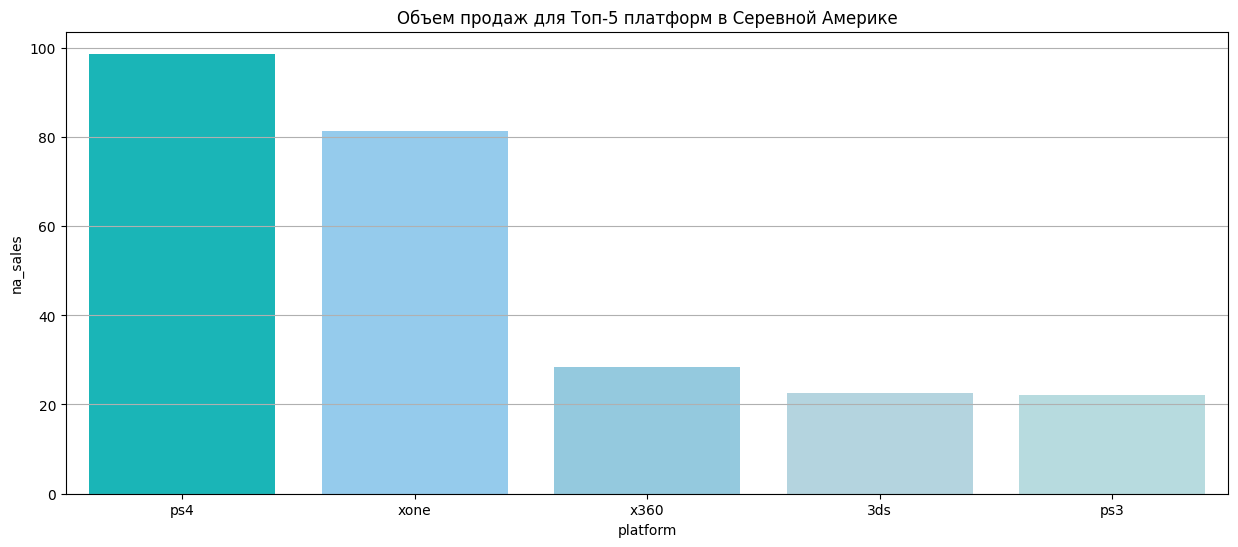

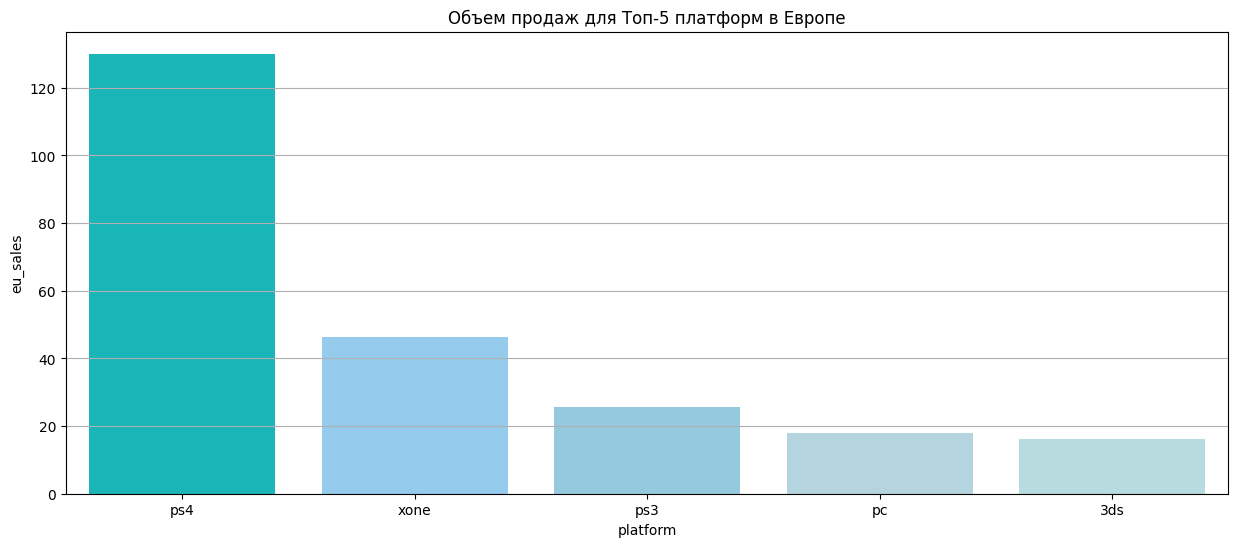

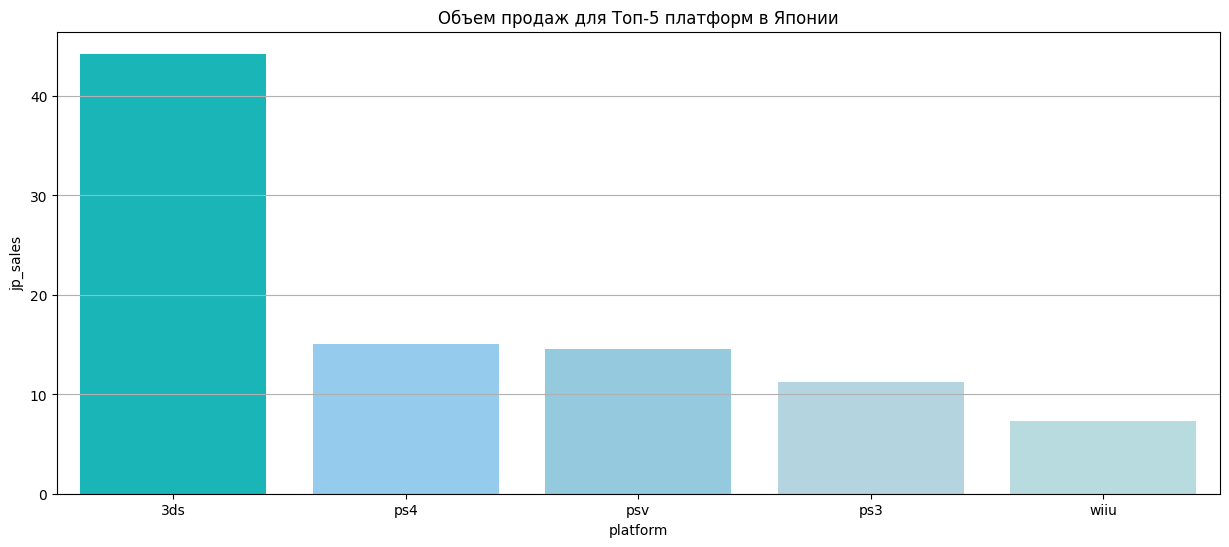

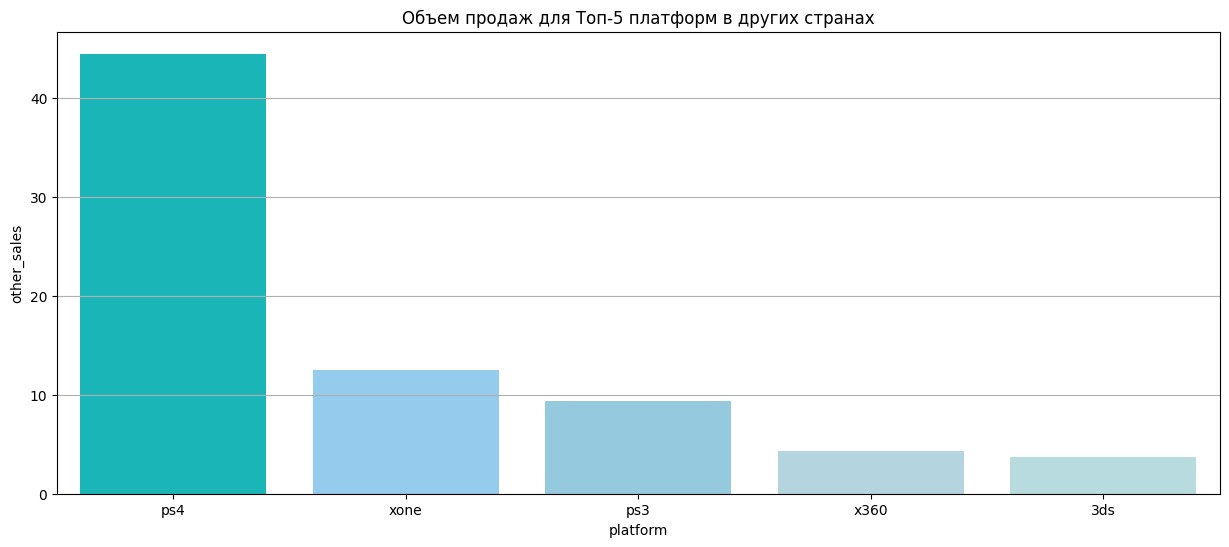

In [63]:
# создадим список регионов
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

# циклом построим диаграммы для показателей объема продаж виеоигр по платформам
for i in regions:
    top_5_platform_for_region(relevant_games, i)

Изучим долю платформ для рынка каждого из регионов

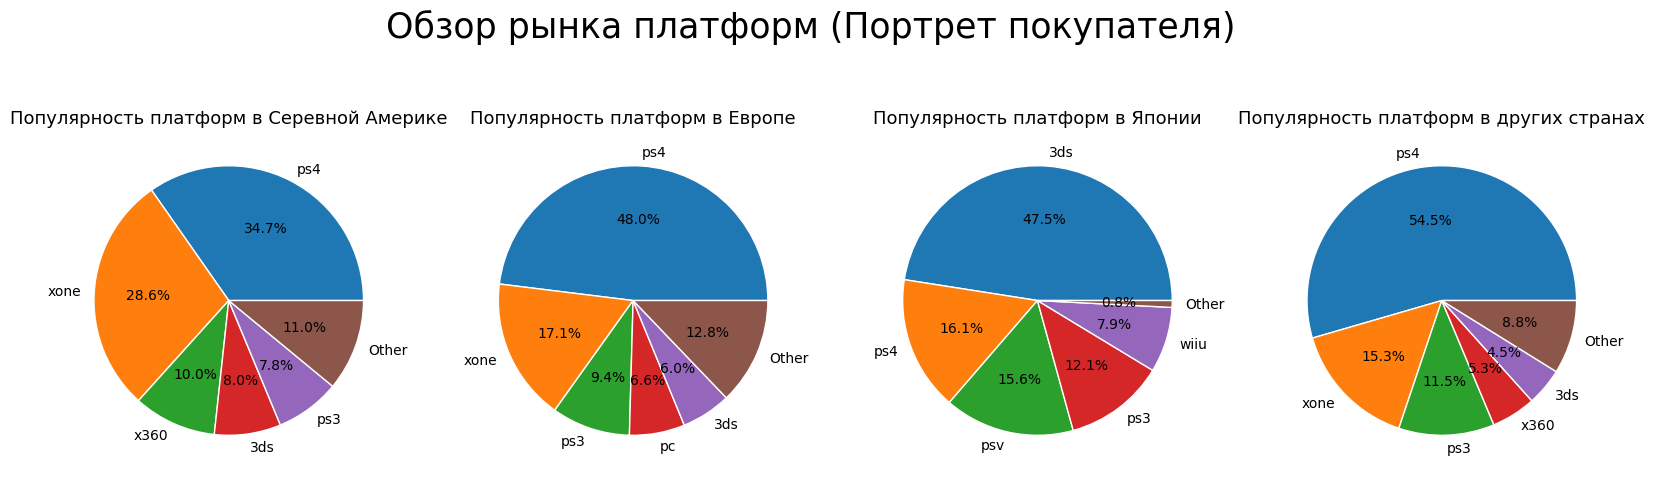

In [64]:
# список регионов
regions = relevant_games.columns[4:8]
# круговая диаграмма для каждого региона
fig, axs = plt.subplots(1, 4, figsize=(20, 6))
fig.suptitle('Обзор рынка платформ (Портрет покупателя)', fontsize=25)
for i in range(4):
    # топ 5 платформ для региона
    platform_top_5 = (relevant_games
                      .groupby('platform')[regions[i]].sum()
                      .reset_index()
                      .sort_values(regions[i], ascending = False, ignore_index = True)
                      .head(5))
    # все, что не вошло в ТОП-5, объединим в категорию "другие"
    platform_top_5 = platform_top_5.append({
        'platform': 'Other', regions[i]: relevant_games[regions[i]].sum() - platform_top_5[regions[i]].sum()
    }, ignore_index= True)
    axs[i].pie(platform_top_5[regions[i]], labels = platform_top_5['platform'], autopct='%1.1f%%', radius=1,
              wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
    # зададим название для гаждого графика
    row= ['Популярность платформ в Серевной Америке', 'Популярность платформ в Европе',
          'Популярность платформ в Японии', 'Популярность платформ в других странах']
    axs[i].set_title(row[i],  fontdict = {'fontsize' : 13})
plt.show()

В Северной Америке и Европе лидирует Play Station 4, при этом в Серевной Америке значительныю популярность набрала Xbox One, а в Японии более популярна портативная консоль Nintendo 3DS и занимает практически половину рынка.


Изучим жанровые предпочтения пользователей

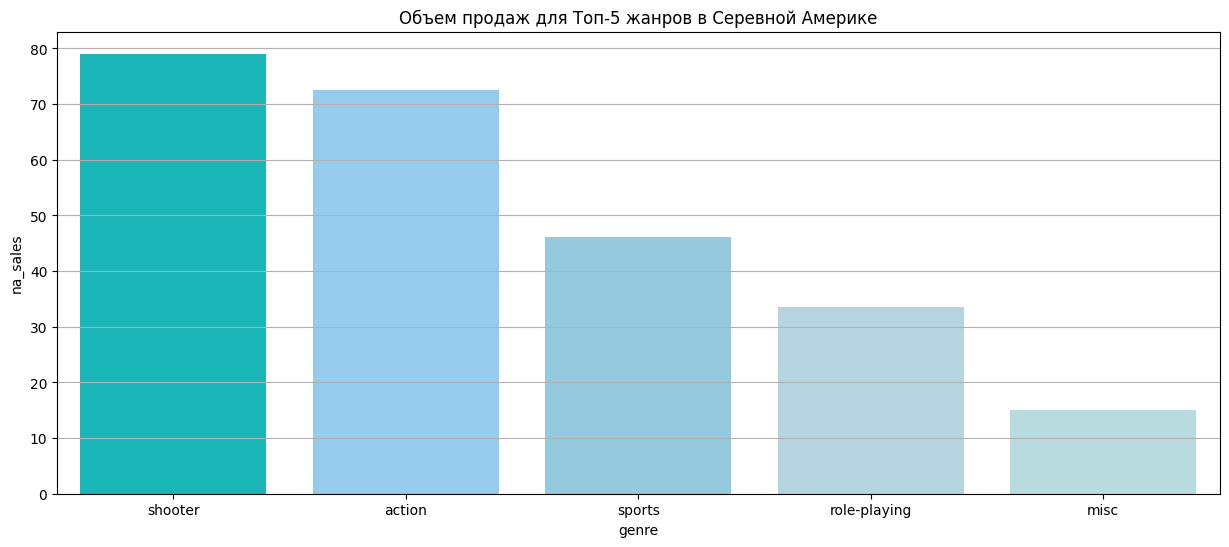

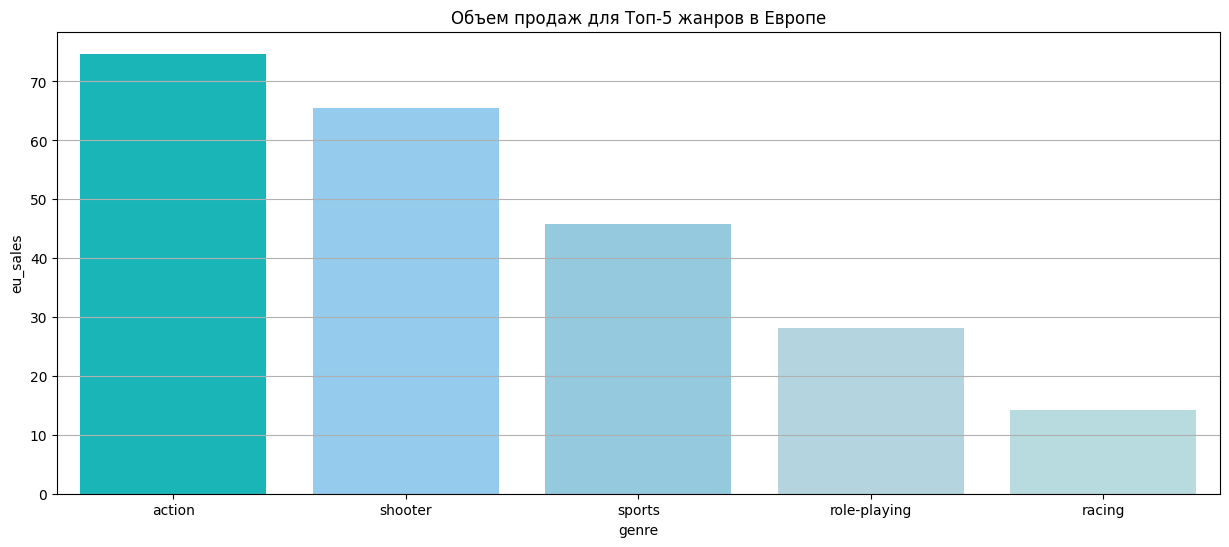

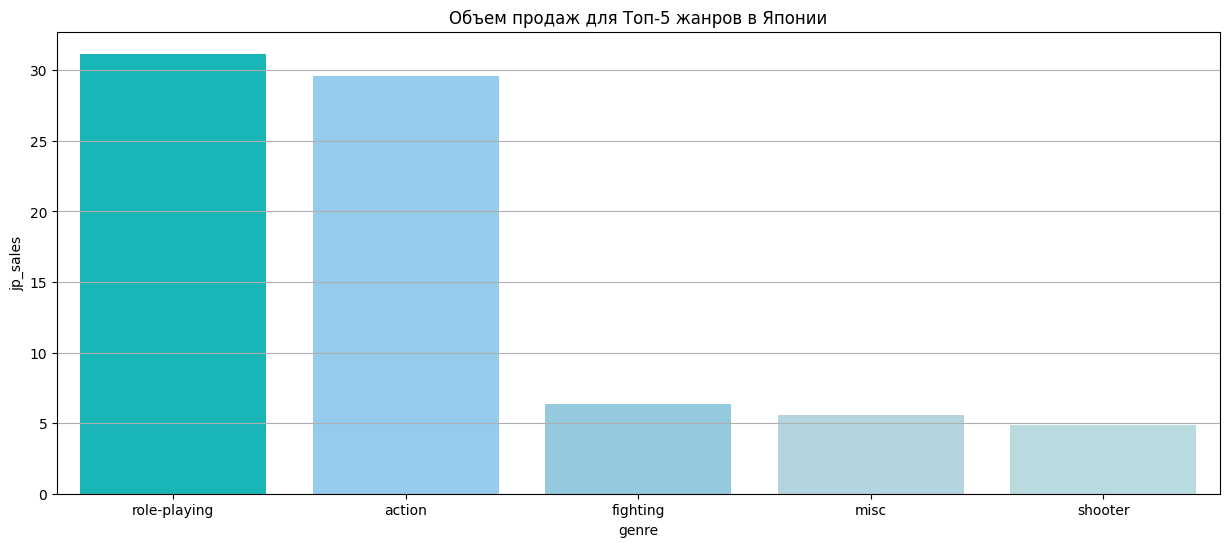

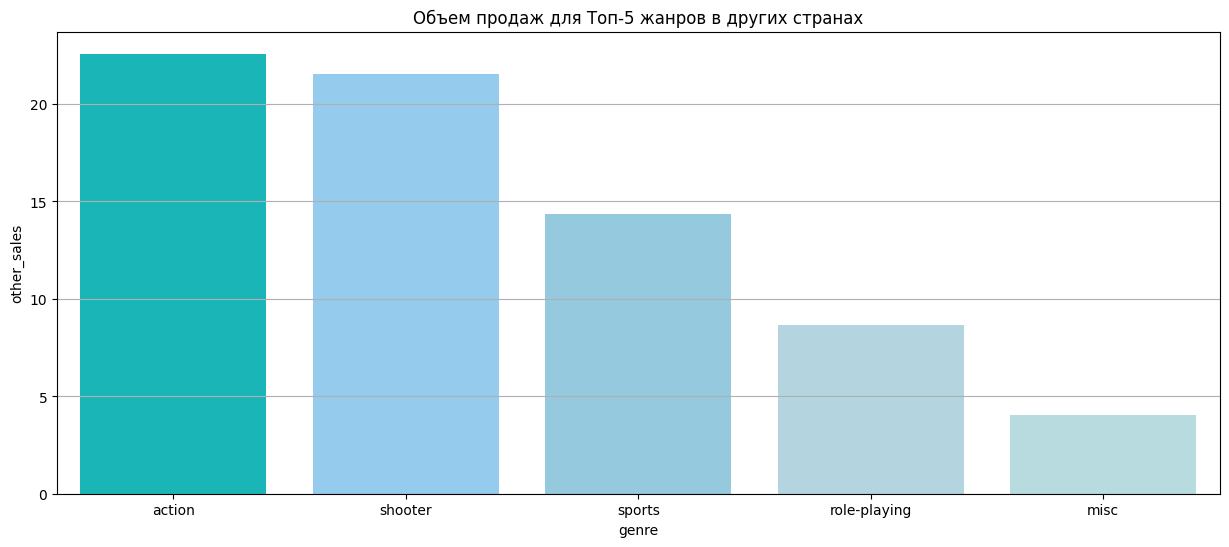

In [65]:
# циклом построим диаграммы для показателей объема продаж виеоигр по жанрам
for i in regions:
    top_5_genre_for_region(relevant_games, i)

Жанровые предтпочтения пользователей совпадают почти по всему миру, самые популярные жанрые - это 'action' и 'shooter'. Исключением является регион Японии где пользователи больше отдают предпочтения жанрам 'rpg' и 'action'. 

Изучим игры с каким рейтингом более популярны в разных регионах

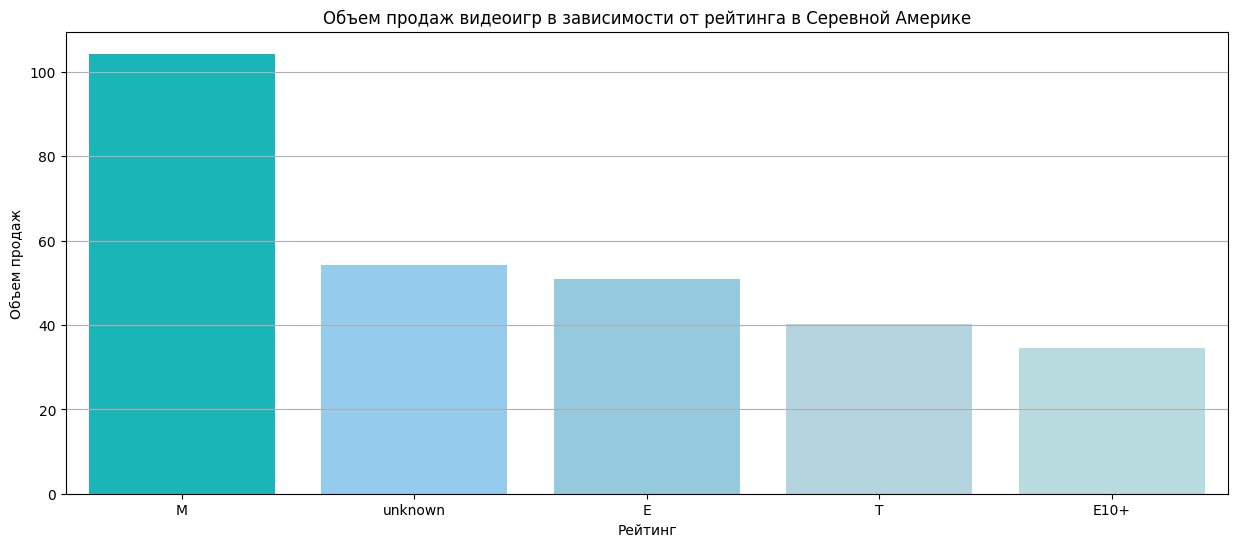

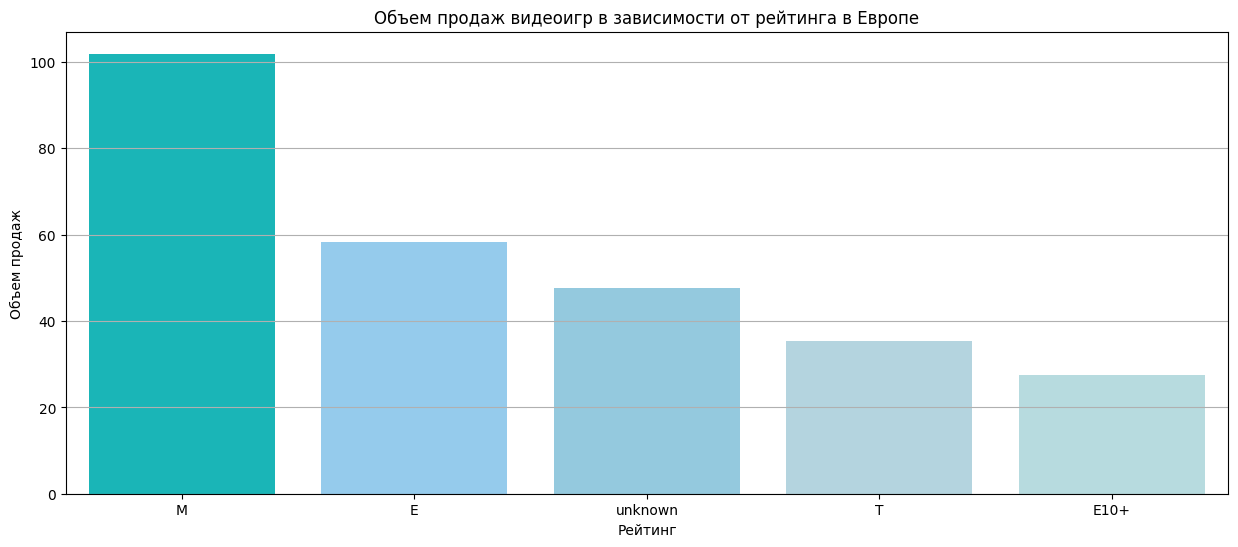

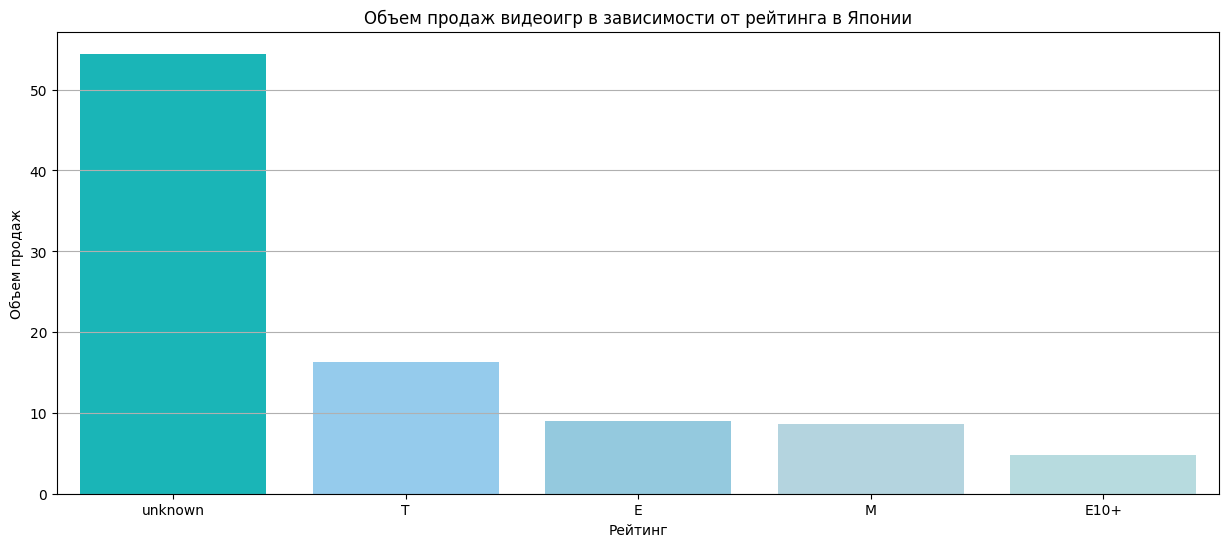

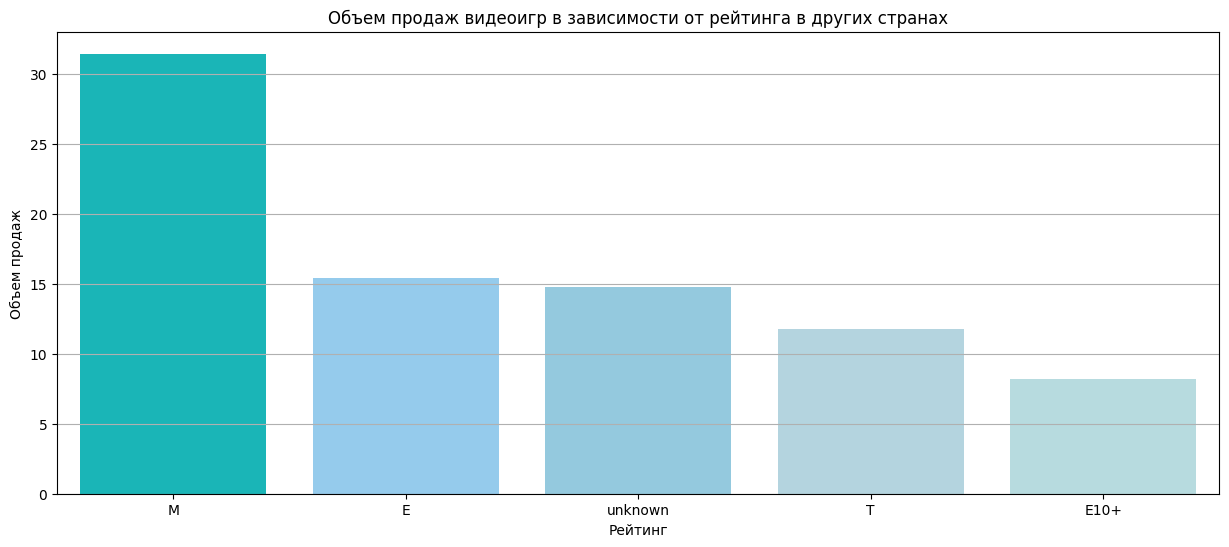

In [66]:
# cоздадим словарь для форматирования графиков зависимости
row= {
        'na_sales': 'Серевной Америке',
        'eu_sales': 'Европе',
        'jp_sales': 'Японии',
        'other_sales': 'других странах'
    }

# циклом построим графики зависимости объема продаж игр от ех ретинга
for i, n in row.items():
    platform_top_5 = (
        relevant_games
        .groupby('rating')[i].sum()
        .sort_values(ascending=False)
    )
    plt.figure(figsize=(15, 6))
    plt.grid(True)
    plt.title(f'Объем продаж видеоигр в зависимости от рейтинга в {n}')
    sns.barplot(
            x=platform_top_5.index, y=platform_top_5, 
            palette=['#00CED1', '#87CEFA', '#87CEEB', '#ADD8E6', '#B0E0E6'])
    plt.xlabel('Рейтинг')
    plt.ylabel('Объем продаж')

По результатам анализа можно сделать вывод, что во всех регионах кроме Японии, игры с рейтингом 'M' обладают наибольшей популярностью. Рейтинг 'M' - подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. В Японии больше всего продаж игр с неизвестным рейтингом, возможно это связано с популярностью в Японии портативных консолей и для локального рынка Японии у игр нет рейтинга от ESRB (Entertainment Software Rating Board).

### Результаты формирования портрета пользователей для разных регионов

- **Северная Америка**
    - Самая популярная платформа для видеоигр среди пользователей в Северной Америке для видеоигр - Play Station 4. При этом в Северной Америке нельзя не отметить любовь пользователей к отечественной платформе Xbox, это особенно заметно сравнивая консоли прошлого поколения - Play Station 3 и Xbox 360 где Xbox всеже лидирует - а Play Station 4 опережает Xbox One не так сильно как в других регионах. Пользователи в Северной Америке предпочитают видеоигры в жанрах 'Action' и 'Shooter' с рейтингом 'M'
    
    
- **Европа**
    - Явным лидером среди платформ для видеоигр у пользователей в Европе выступает Play Station как новое поколение так и прошлое (ps4 и ps3). При этом PLay Station 3 по объему продаж опережает даже новое поколение Xbox One. Но как и в Северной Америке пользователи в Европе предпочитают видеоигры в жанрах 'Action' и 'Shooter' с рейтингом 'M'
    
    
- **Япония**
    - В Японии популярность платформ сильно отличается от рынков Северной Америки и Европы. Пользователи в Японии в подавляющем большинстве отдают предпочтение портативным консолям а не стационарным, и самой популярной платформой является Nintendo 3DS. При этом ключевой интерес у пользователей вызывают игры в жанрах 'RPG' и 'Action'. Наиболее популярный рейтинг для игр не известен, возможно для локального рынка Японии у игр для портативных консолей нет рейтинга от ESRB (Entertainment Software Rating Board)
    
    
- **Другие страны**
    - Ситуация в других странах приближена к Европейскому рынку. По объему продаж лидирует Play Station, как новое поколение так и прошлое (ps4 и ps3). При этом PLay Station 3 по объему продаж опережает даже новое поколение Xbox One. При этом пользователи предпочитают видеоигры в жанрах 'Action' и 'Shooter' с рейтингом 'M'

## Проверка гипотез

Проверим несколько гипотез, которые могут помочь сделать ставку на потенциально популярный продукт, а именно:


- **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?**
- **Средние пользовательские рейтинги жанров Action и Sports разные?**


На основании Центральной предельной теоремы и проверки равенства средних значений в двух выборках будем использовать t-критерий Стьюдента а для получения более точных результатов параметр статистической значимости примем равным 0.01. Уровнем значимости задаётся вероятность попасть слишком далеко от центра распределения.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?

Проверим гипотезу. Для этого сформулируем нулевую (**H_0**) и альтернативную гипотезу(**H_1**):
- **H_0**: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- **H_1**: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [67]:
# проверим двустороннюю гипотезу с помощью готового метода библиотеки SciPy
# создадаим 2 выборки с играми для платформы Xbox One и PC
relevant_games_xone = relevant_games.query('platform == "xone"')
relevant_games_pc = relevant_games.query('platform == "pc"')

# nan_policy='omit' - позволит игнорировать возможные пропуски в данных
alpha = 0.01
results = st.ttest_ind(
    relevant_games_xone['user_score'], 
    relevant_games_pc['user_score'],
    alternative = 'two-sided',
    nan_policy='omit'
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10450490196035389
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средние пользовательские рейтинги платформ Xbox One и PC и неодинаковые, с вероятностью в 10,5% наблюдаемое различие в оценках или большее можно получить случайно из-за ошибки случайной выборки. Верятность 10,5% слишком высокая чтобы делать вывод о значимом различии в пользовательских оценках платформ Xbox One и PC

In [68]:
relevant_games_xone['user_score'].mean()

6.5945454

In [69]:
relevant_games_pc['user_score'].mean()

6.2983603

In [70]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.19124505225722097
Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action и Sports разные?

Проверим гипотезу. Для этого сформулируем нулевую (**H_0**) и альтернативную гипотезу(**H_1**):
- **H_0**: Средние пользовательские рейтинги жанров Action и Sports одинаковые
- **H_1**: Средние пользовательские рейтинги жанров Action и Sports разные

In [71]:
# проверим двустороннюю гипотезу с помощью готового метода библиотеки SciPy
# создадаим 2 выборки с играми для для жанров Action и Sports
relevant_games_action = relevant_games.query('genre == "action"')
relevant_games_sports = relevant_games.query('genre == "sports"')

# nan_policy='omit' - позволит игнорировать возможные пропуски в данных
alpha = 0.01
results = st.ttest_ind(
    relevant_games_action['user_score'], 
    relevant_games_sports['user_score'],
    nan_policy='omit'
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.871200935124735e-19
Отвергаем нулевую гипотезу


Вероятность получить наблюдаемый или ещё более далекий от предполагаемого результат при условии, что нулевая гипотеза верна = 0,02871200935124735%. Поэтому у нас есть основания говорить о том что средние пользовательские рейтинги жанров Action и Sports действительно разные.

## Выводы

- **Описание данных**
    - В датасете представлены исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation)
    - Данные в датасете охватывают период с 1980 по 2016 года
    

- **Результаты предобработки данных**
    - Столбцы и значения в них приведены к общему виду
    - Данные очищены от 30.4% пропусков 
    - Изменены и оптимизированы типы данных в датасете, что позволило уменьшить объем занимаемой датасетом памяти на 18.7%
    - Удалены дубликаты игр, которые выходили на одной платформе в один год
    
    
- **Результаты исследовательского анализа данных**
    - Стабильный рост объема выпускаемых игр наблюдается с 1991 года. Стремительное увеличение выпускаемых игр приходится на 2001 - 2002 года, после следующих пары лет (2003-2004 года) объем выпускаемых игр ежегодно увеличивается вплоть до 2008 - 2009 годов. Пик популярности игр как раз приходится на 2008 - 2009 года после чего наблюдается резкое снижение объема выпускаемых ежегодно игр. Вожможно пользователи стали более выборочны и придирчивы к различным играм и разработчикам пришлось сосредоточиться на качестве выпускаемых игр а не на их количестве
        
    - Средний период жизни платформ длится 8-10 лет. Скорее всего это причина в сменяемости поколений как видеоигр так и в большей части самих платформ. Поэтому актуальным периодом для анализа данных был определен период в 3 года, включая текущий год
    
    - Самой популярной платформой для видеоигр за последние 4 года оказалась PS4 - объем проданных копий для нее почти 300 млн. В Топ 5 лидеров рынка вошли:
        - **Play Station 4 (PS4)** — явный лидер на рынке и ежегодно популярность видеоигр для этой платформы только растет
        - **Play Station 3 (PS3)** — прошлое поколение консолей Play Station, на смену которому пришла PS4, показывает отрицательную динамику с каждым годом. Возможно до заката Play Station 3 осталось не так много времени, учитывая что пик популярности PS3 был в 2011 году
        - **Xbox One** — показывает ту же динамику что и PS4, это не удиветельно ведь эти консоли одного поколения и вышли в один год (2013), но в плане абсолютных объемов вышедших видеоигр, Xbox One значительно уступает своему конкуренту - PS4
        - **Nintendo 3DS** — платформа, которая показывает самые стабильные результаты с момента своего выхода в 2011 году. При этом объемы вышедших видеоигр для консоли Nintendo 3DS хоть и стабильны, но все же с каждым годом снижаются. Явных конкурентов у консоли Nintendo 3DS нет, ведь это портативная а не стационарная консоль. При этом данные за 2016 год могут быть не полными.
        - **Xbox 360** — прошлое поколение консолей Xbox, на смену которому пришла Xbox One, показывает отрицательную динамику с каждым годом и ситуация абсолютна идентична консолям PS3 - PS4. По всей вероятности до заката Xbox 360 осталось времени не больше чем у PS3, пик популярности Xbox 360 также приходится на 2011 год
       
    - Отзывы пользователей и критиков на объем продаж внутри платформ влияют очень незначительно либо не влияют вовсе
    - В Топ-3 жанра по объему проданых копий в среднем на одну выпущенную игру вошли
        - Shooter
        - Sports
        - Platform
    - Наименее перспективные жанры
        - Puzzle
        - Strategy
        - Adventure


- При этом Xbox 360 и Play Station 3 уже исполнилось 11 лет и они с малой вероятностью станут перспективными или сохранят продажи в 2017 году. При этом на смену платформы Wii U в 2017 году придет Nintendo Switch, которая была продемонстрирована в октябре 2016. А у оставшихся платформ показатели продаж сильно ниже чем у лидеров. Поэтому наиболее перспективными платформами можно считать:
    - **Play Station 4 (PS4)**
    - **Xbox One**
    - **Nintendo 3DS**


- **Портрет пользователя для каждого региона**
    - Северная Америка
        - Самая популярная платформа для видеоигр среди пользователей в Северной Америке для видеоигр - Play Station 4. При этом в Северной Америке нельзя не отметить любовь пользователей к отечественной платформе Xbox, это особенно заметно сравнивая консоли прошлого поколения - Play Station 3 и Xbox 360 где Xbox всеже лидирует - а Play Station 4 опережает Xbox One не так сильно как в других регионах. Пользователи в Северной Америке предпочитают видеоигры в жанрах 'Action' и 'Shooter' с рейтингом 'M'
    - Европа
        - Явным лидером среди платформ для видеоигр у пользователей в Европе выступает Play Station как новое поколение так и прошлое (ps4 и ps3). При этом PLay Station 3 по объему продаж опережает даже новое поколение Xbox One. Но как и в Северной Америке пользователи в Европе предпочитают видеоигры в жанрах 'Action' и 'Shooter' с рейтингом 'M'
    - Япония
        - В Японии популярность платформ сильно отличается от рынков Северной Америки и Европы. Пользователи в Японии в подавляющем большинстве отдают предпочтение портативным консолям а не стационарным, и самой популярной платформой является Nintendo 3DS. При этом ключевой интерес у пользователей вызывают игры в жанрах 'RPG' и 'Action'. Наиболее популярный рейтинг для игр не известен, возможно для локального рынка Японии у игр для портативных консолей нет рейтинга от ESRB (Entertainment Software Rating Board)
    - Другие страны
        - Ситуация в других странах приближена к Европейскому рынку. По объему продаж лидирует Play Station, как новое поколение так и прошлое (ps4 и ps3). При этом PLay Station 3 по объему продаж опережает даже новое поколение Xbox One. При этом пользователи предпочитают видеоигры в жанрах 'Action' и 'Shooter' с рейтингом 'M'


- **Проверены гипотезы, которые могут помочь сделать ставку на потенциально популярный продукт**:
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?
        - Есть основания полагать что средние пользовательские рейтинги платформ Xbox One и PC одинаковые или отличаются очень незначительно
    - Средние пользовательские рейтинги жанров Action и Sports разные?
        - Есть основания говорить о том что средние пользовательские рейтинги жанров Action и Sports действительно разные
   
   
- **Рекомендации на 2017 год**:
    - Выбор рекламных компаний следует учитывать в зависимости от региона в котором будет будет проходить сама компания:
        - Для рынка Северной Америки следует обратить внимания на видеоигры выпускаемые на Play Station 4. Следует сосредоточиться на играх в жанрах 'Action' и 'Shooter' с рейтингом 'M'
        - Для рынка Европы флагманами будут игры для Play Station 4. Внимание нужно уделить играм в жанрах 'Action' и 'Shooter' с рейтингом 'M'.
        - Для рынка Японии нужно сосредоточниться на портативных консолях (В большей части Nintendo 3DS) и проводить рекламные компании для игр в жанре 'RPG' и 'Action'
        - Для рынка других стран следует обратить внимание на видеоигры выпускаемые на Play Station 4 в жанрах 'Action' и 'Shooter' с рейтингом 'M'